# Course Project - Solar PV in Germany

Part I - Machine Learning

*Name*: Andreas Eckmann

*E-Mail*: eckmanna@ethz.ch

## Set Up

In [1]:
from IPython.display import display
import pandas as pd
pd.options.display.max_columns = None # Display all columns of a dataframe
pd.options.display.max_rows = 700
from pprint import pprint

import time
import datetime
import os
import numpy as np
import pandas as pd
import re
from bs4 import BeautifulSoup
import sklearn

In [2]:
# To plot pretty figures
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
#%matplotlib notebook
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings = lambda *a, **kw: None

## Reading Data

# SHIFTED Data

In [532]:
# load the csv data from my online repository
data = pd.read_excel('https://raw.githubusercontent.com/eckmanna/big_data_policy_2020/master/course_project/data/df_pv_data_germany_fit-shifted.xlsx').iloc[:, :] #avoiding "unnamed"-row
print(data.shape,
      data.head())

(464, 23)    Year         Bundesland  Installed_Cap  Installed_Cap_below_30  \
0  1992  Baden-Württemberg        124.661                 124.661   
1  1992             Bayern        157.574                 157.574   
2  1992             Berlin        127.110                 127.110   
3  1992        Brandenburg         37.880                  37.880   
4  1992             Bremen         57.060                  57.060   

   Cum_Installed_cap  Cum_Installed_Cap_below_30  module_cost  feed-in  \
0            124.661                     124.661          8.0      NaN   
1            157.574                     157.574          8.0      NaN   
2            127.110                     127.110          8.0      NaN   
3             37.880                      37.880          8.0      NaN   
4             57.060                      57.060          8.0      NaN   

   population      area   log_area       GDP  Installed_Cap_pa  \
0  10148708.0  35673.71  10.482169  255866.0          0.003494  

# REGULAR DATA

In [530]:
# load the csv data from my online repository
data = pd.read_excel('https://raw.githubusercontent.com/eckmanna/big_data_policy_2020/master/course_project/data/df_pv_data_germany.xlsx').iloc[:, :] #avoiding "unnamed"-row
print(data.shape,
      data.head())

(464, 23)    Year         Bundesland  Installed_Cap  Installed_Cap_below_30  \
0  1992  Baden-Württemberg        124.661                 124.661   
1  1992             Bayern        157.574                 157.574   
2  1992             Berlin        127.110                 127.110   
3  1992        Brandenburg         37.880                  37.880   
4  1992             Bremen         57.060                  57.060   

   Cum_Installed_cap  Cum_Installed_Cap_below_30  module_cost  feed-in  \
0            124.661                     124.661          8.0   8.4303   
1            157.574                     157.574          8.0   8.4303   
2            127.110                     127.110          8.0   8.4303   
3             37.880                      37.880          8.0   8.4303   
4             57.060                      57.060          8.0   8.4303   

   population      area   log_area       GDP  Installed_Cap_pa  \
0  10148708.0  35673.71  10.482169  255866.0          0.003494  

In [494]:
data.dtypes

Year                               int64
Bundesland                        object
Installed_Cap                    float64
Installed_Cap_below_30           float64
Cum_Installed_cap                float64
Cum_Installed_Cap_below_30       float64
module_cost                      float64
feed-in                          float64
population                       float64
area                             float64
log_area                         float64
GDP                              float64
Installed_Cap_pa                 float64
Cum_Installed_Cap_pa             float64
Installed_Cap_below_30_pc        float64
Cum_Installed_Cap_below_30_pc    float64
Installed_Cap_pc                 float64
Cum_Installed_Cap_pc             float64
pop_density                      float64
GDP_pc                           float64
solar_irradiance                   int64
sun_hours                          int64
share_green_party                float64
dtype: object

## Data plotting

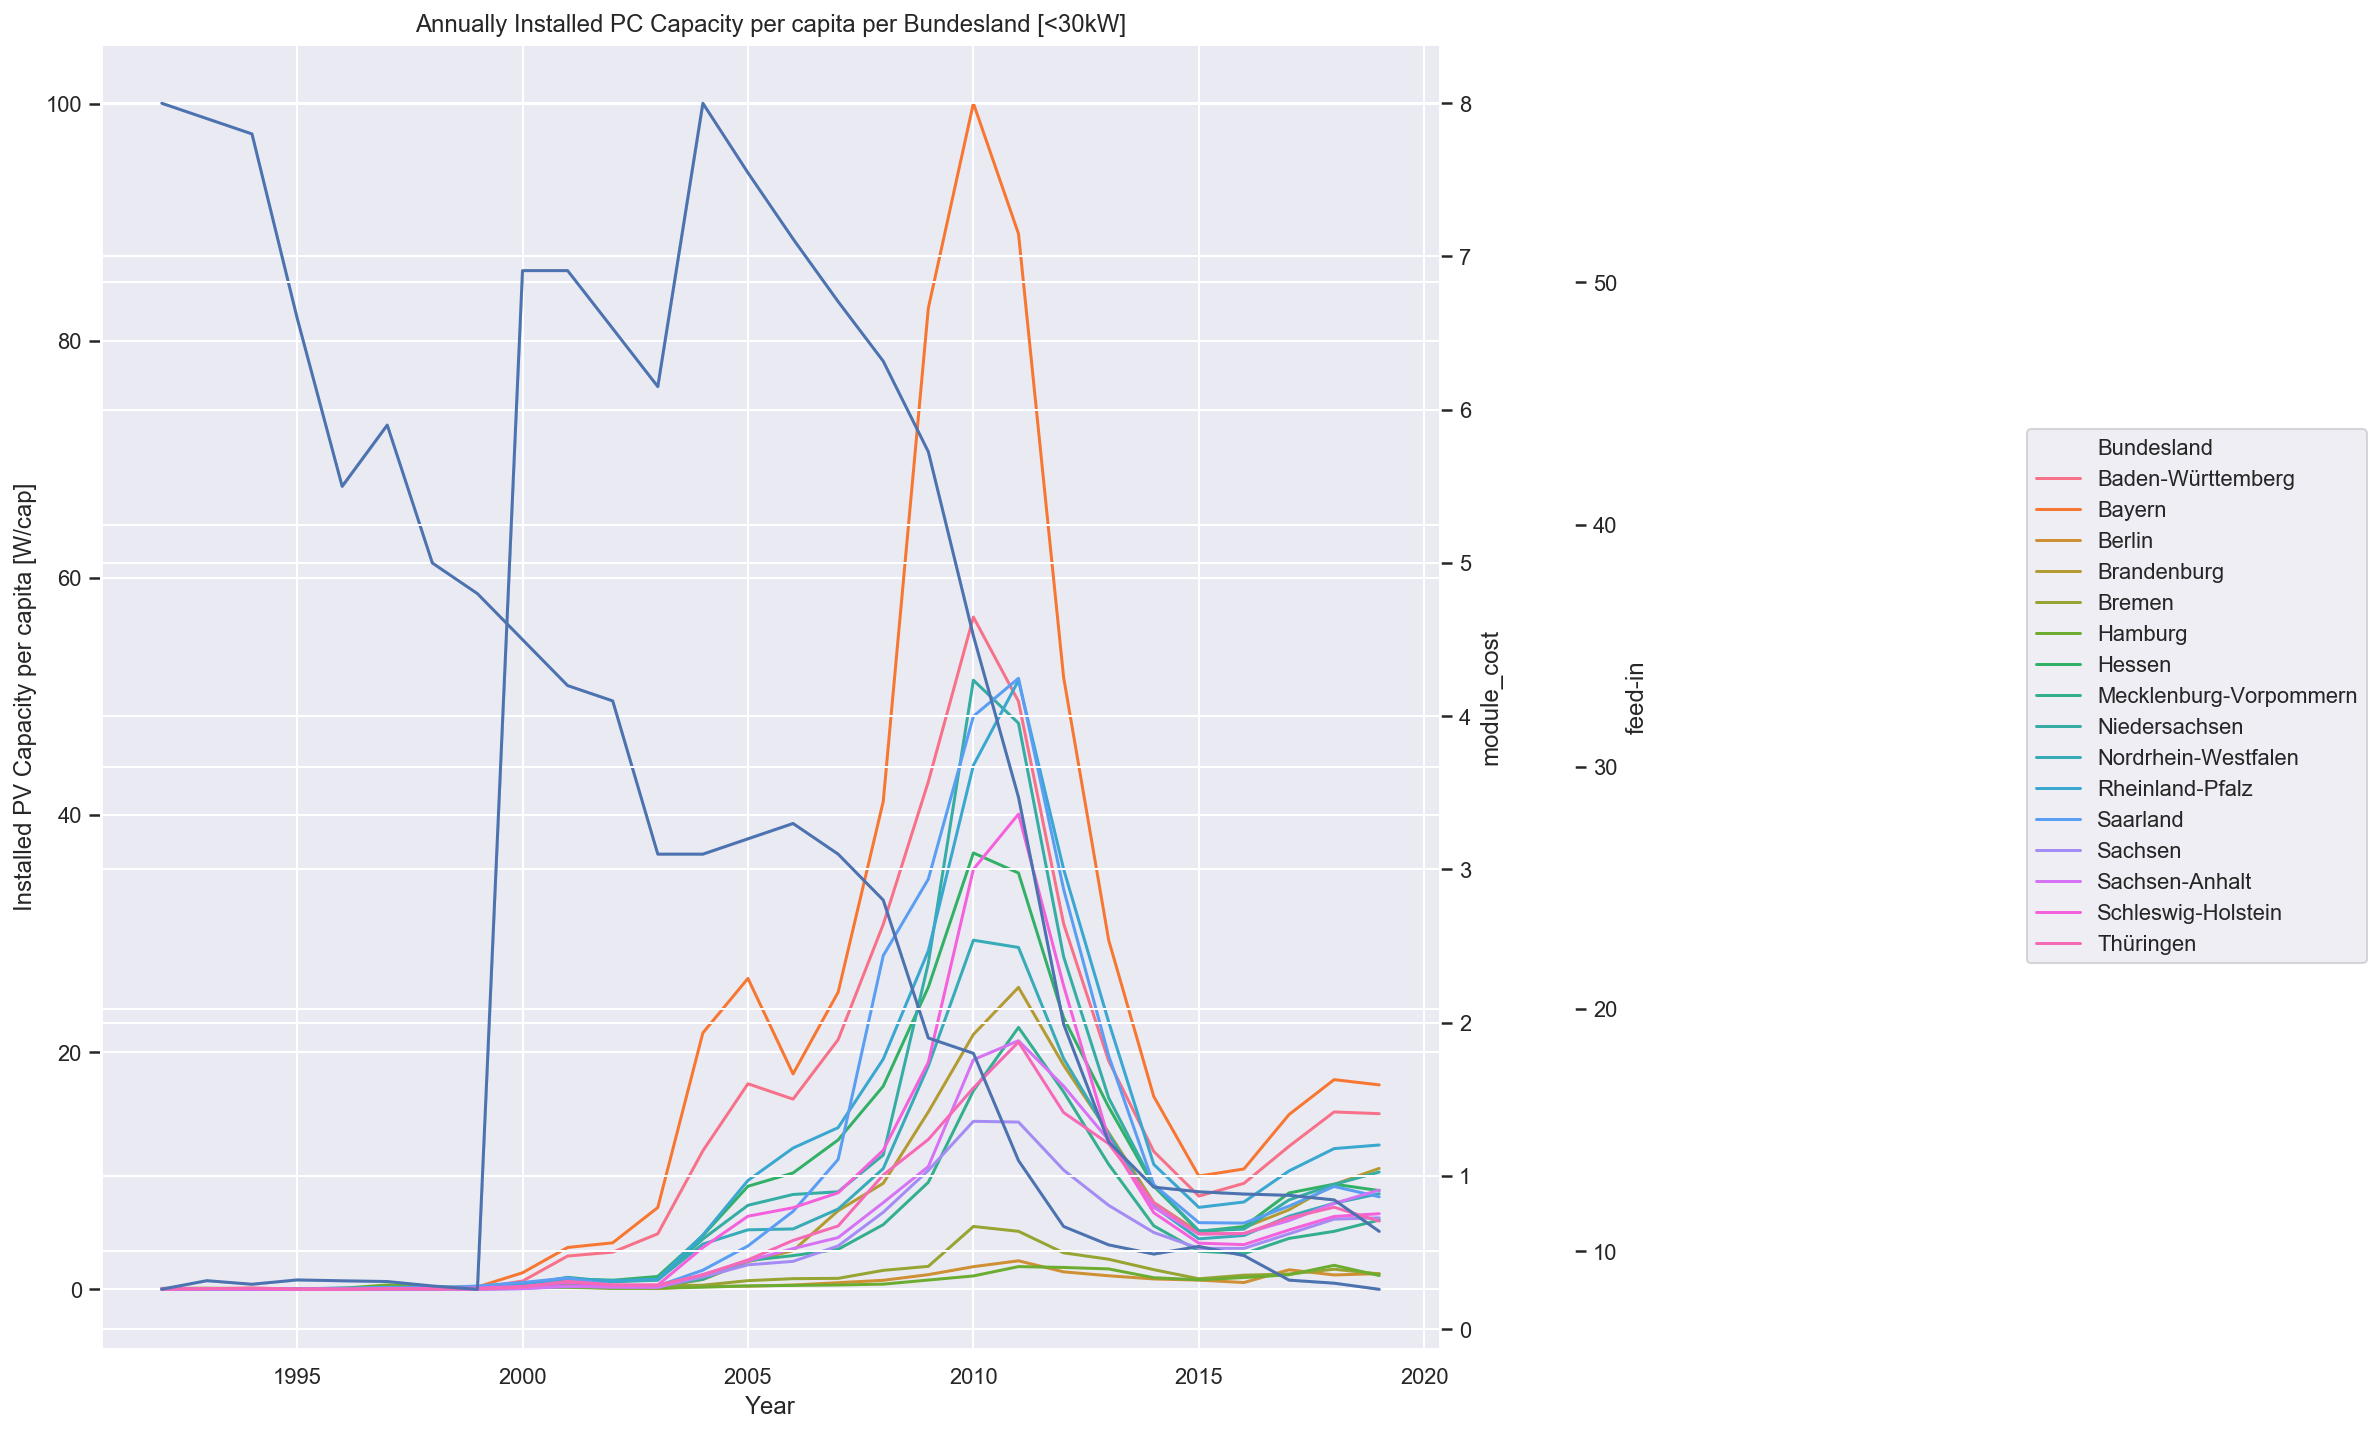

In [531]:
p1 = sns.lineplot(x = "Year", y="Installed_Cap_below_30_pc", hue="Bundesland", data = data)

#plot module-costs
ax2 = p1.twinx()
sns.lineplot(x = "Year", y="module_cost", data = data, ax = ax2)
ax2.spines['right'].set_position(('axes', 1.0))

#plot feed-in
ax3 = p1.twinx()
ax3.spines['right'].set_position(('axes', 1.1))
sns.lineplot(x = "Year", y="feed-in", data = data, ax = ax3)

p1.legend(loc='center right', bbox_to_anchor=(1.7, 0.5), ncol=1)
p1.set(xlabel="Year",
       ylabel="Installed PV Capacity per capita [W/cap]",
       title= "Annually Installed PC Capacity per capita per Bundesland [<30kW]")
plt.show()

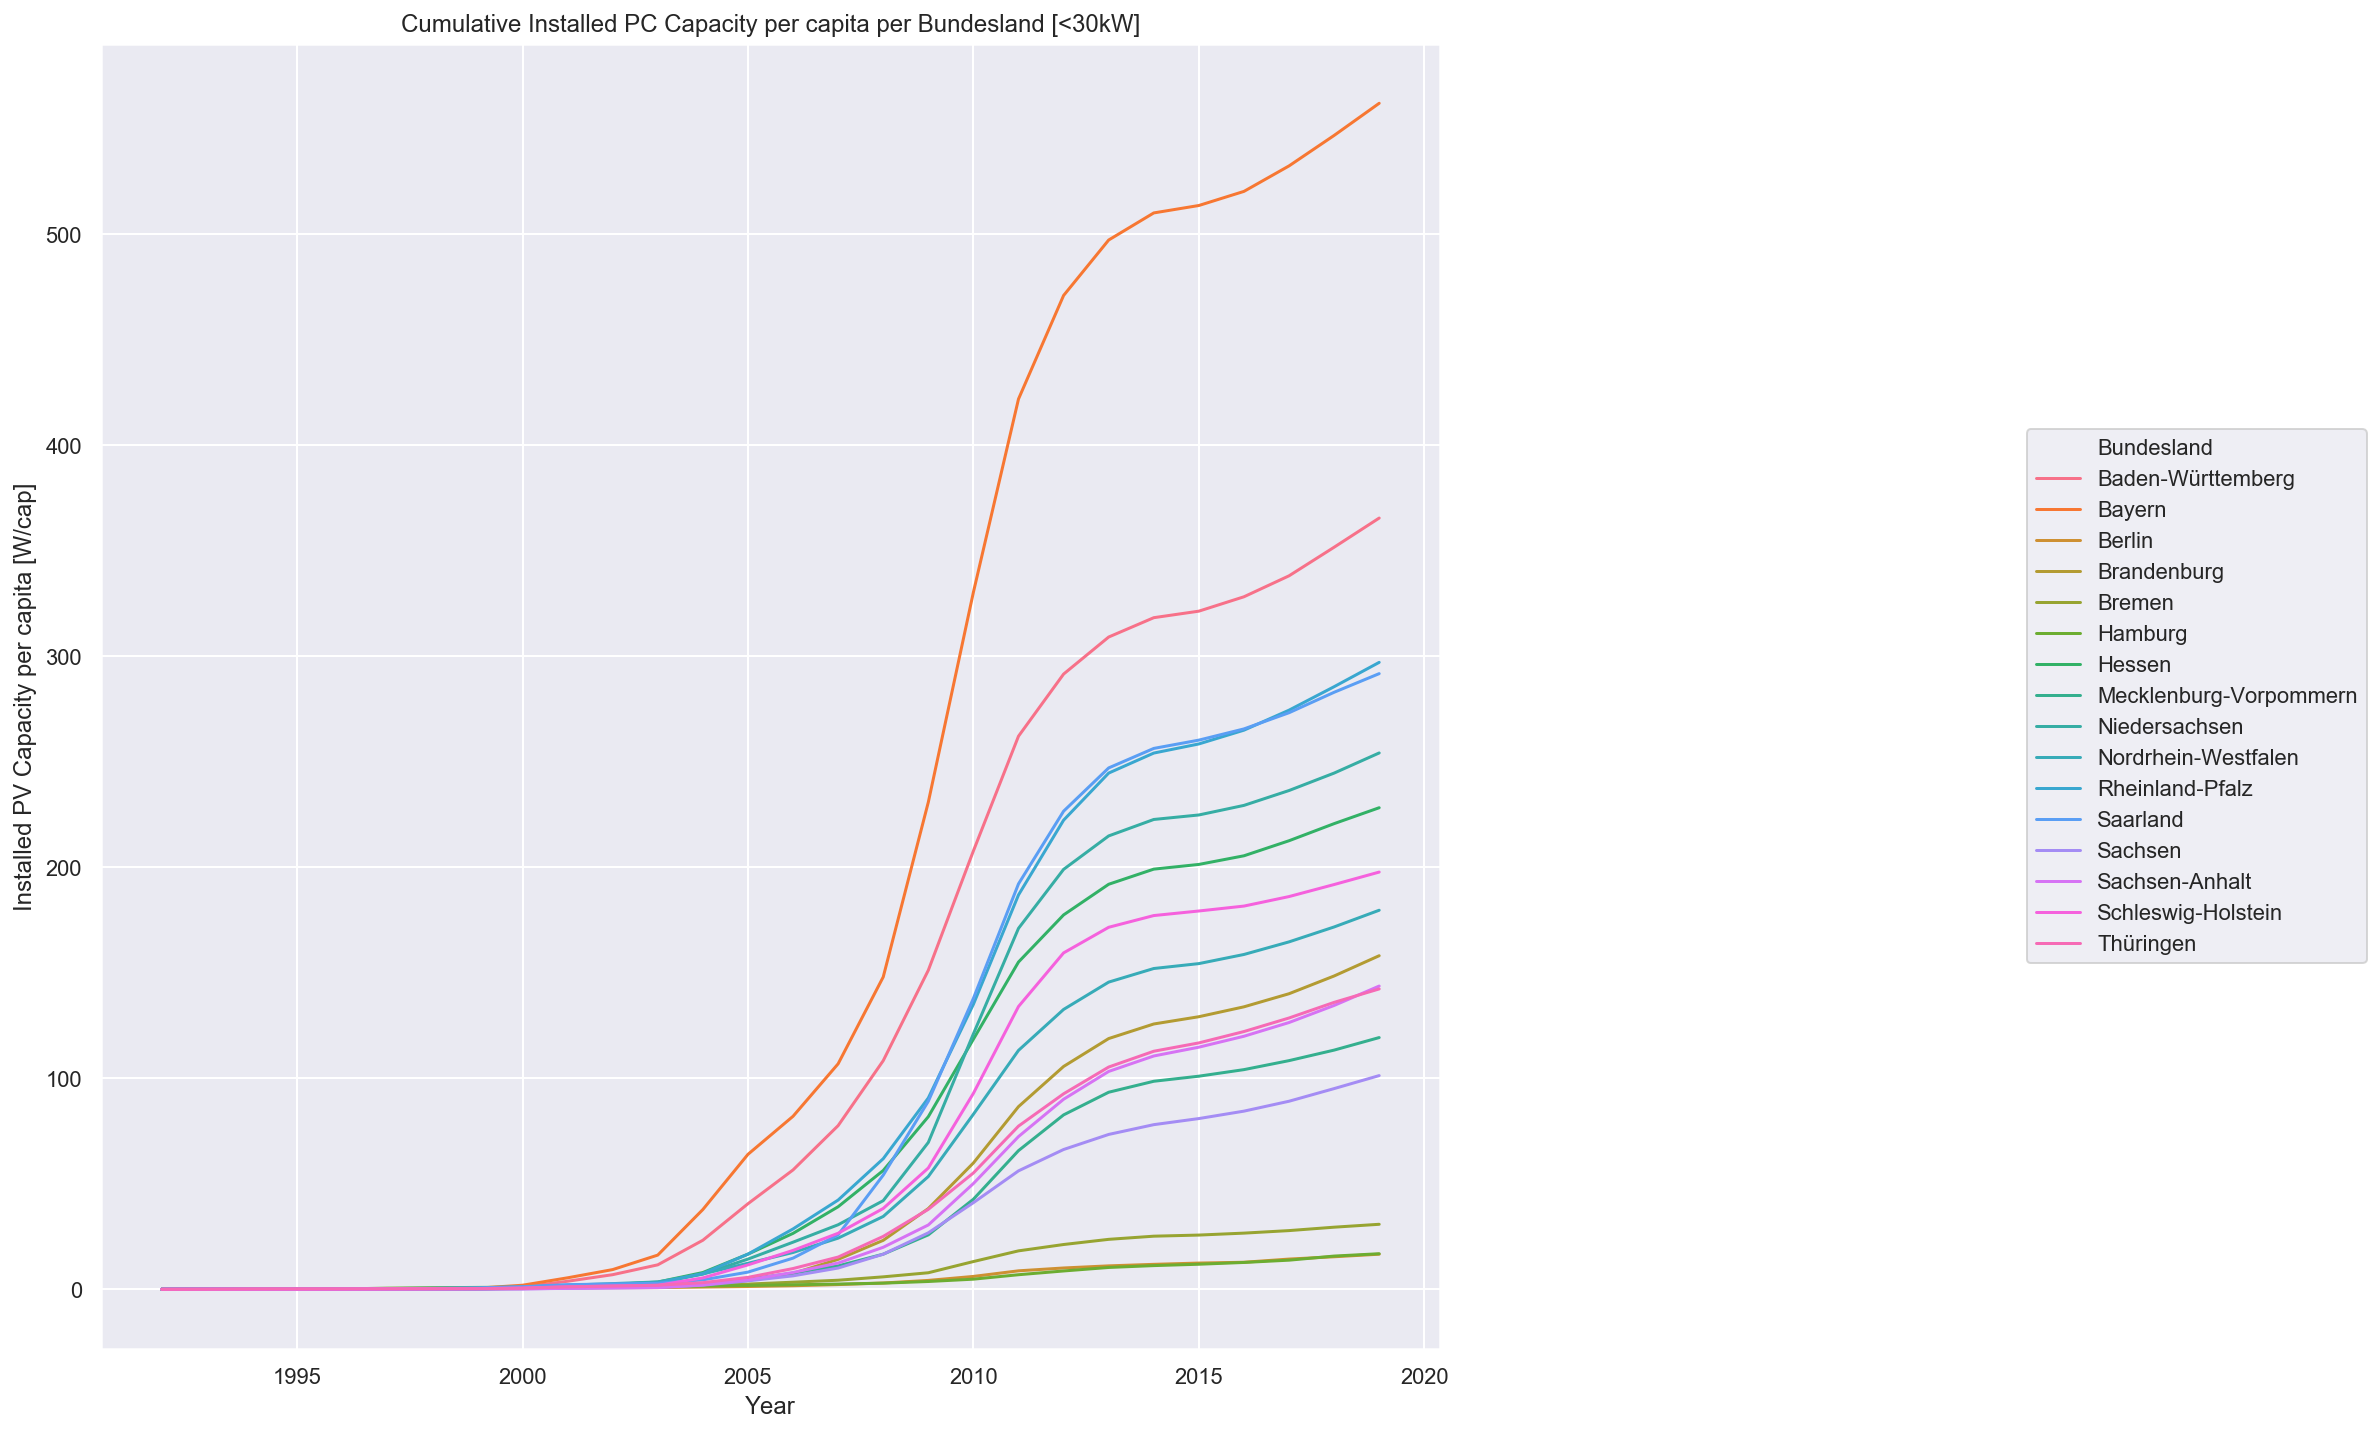

In [496]:
p2 = sns.lineplot(x="Year", y="Cum_Installed_Cap_below_30_pc", hue="Bundesland", data = data)
p2.legend(loc='center right', bbox_to_anchor=(1.7, 0.5), ncol=1)
p2.set(xlabel="Year",
       ylabel="Installed PV Capacity per capita [W/cap]",
       title= "Cumulative Installed PC Capacity per capita per Bundesland [<30kW]")
plt.show()

[Text(0, 0.5, 'GDP per capita [EUR/cap]'),
 Text(0.5, 0, 'Year'),
 Text(0.5, 1.0, 'GDP per capita per Bundesland')]

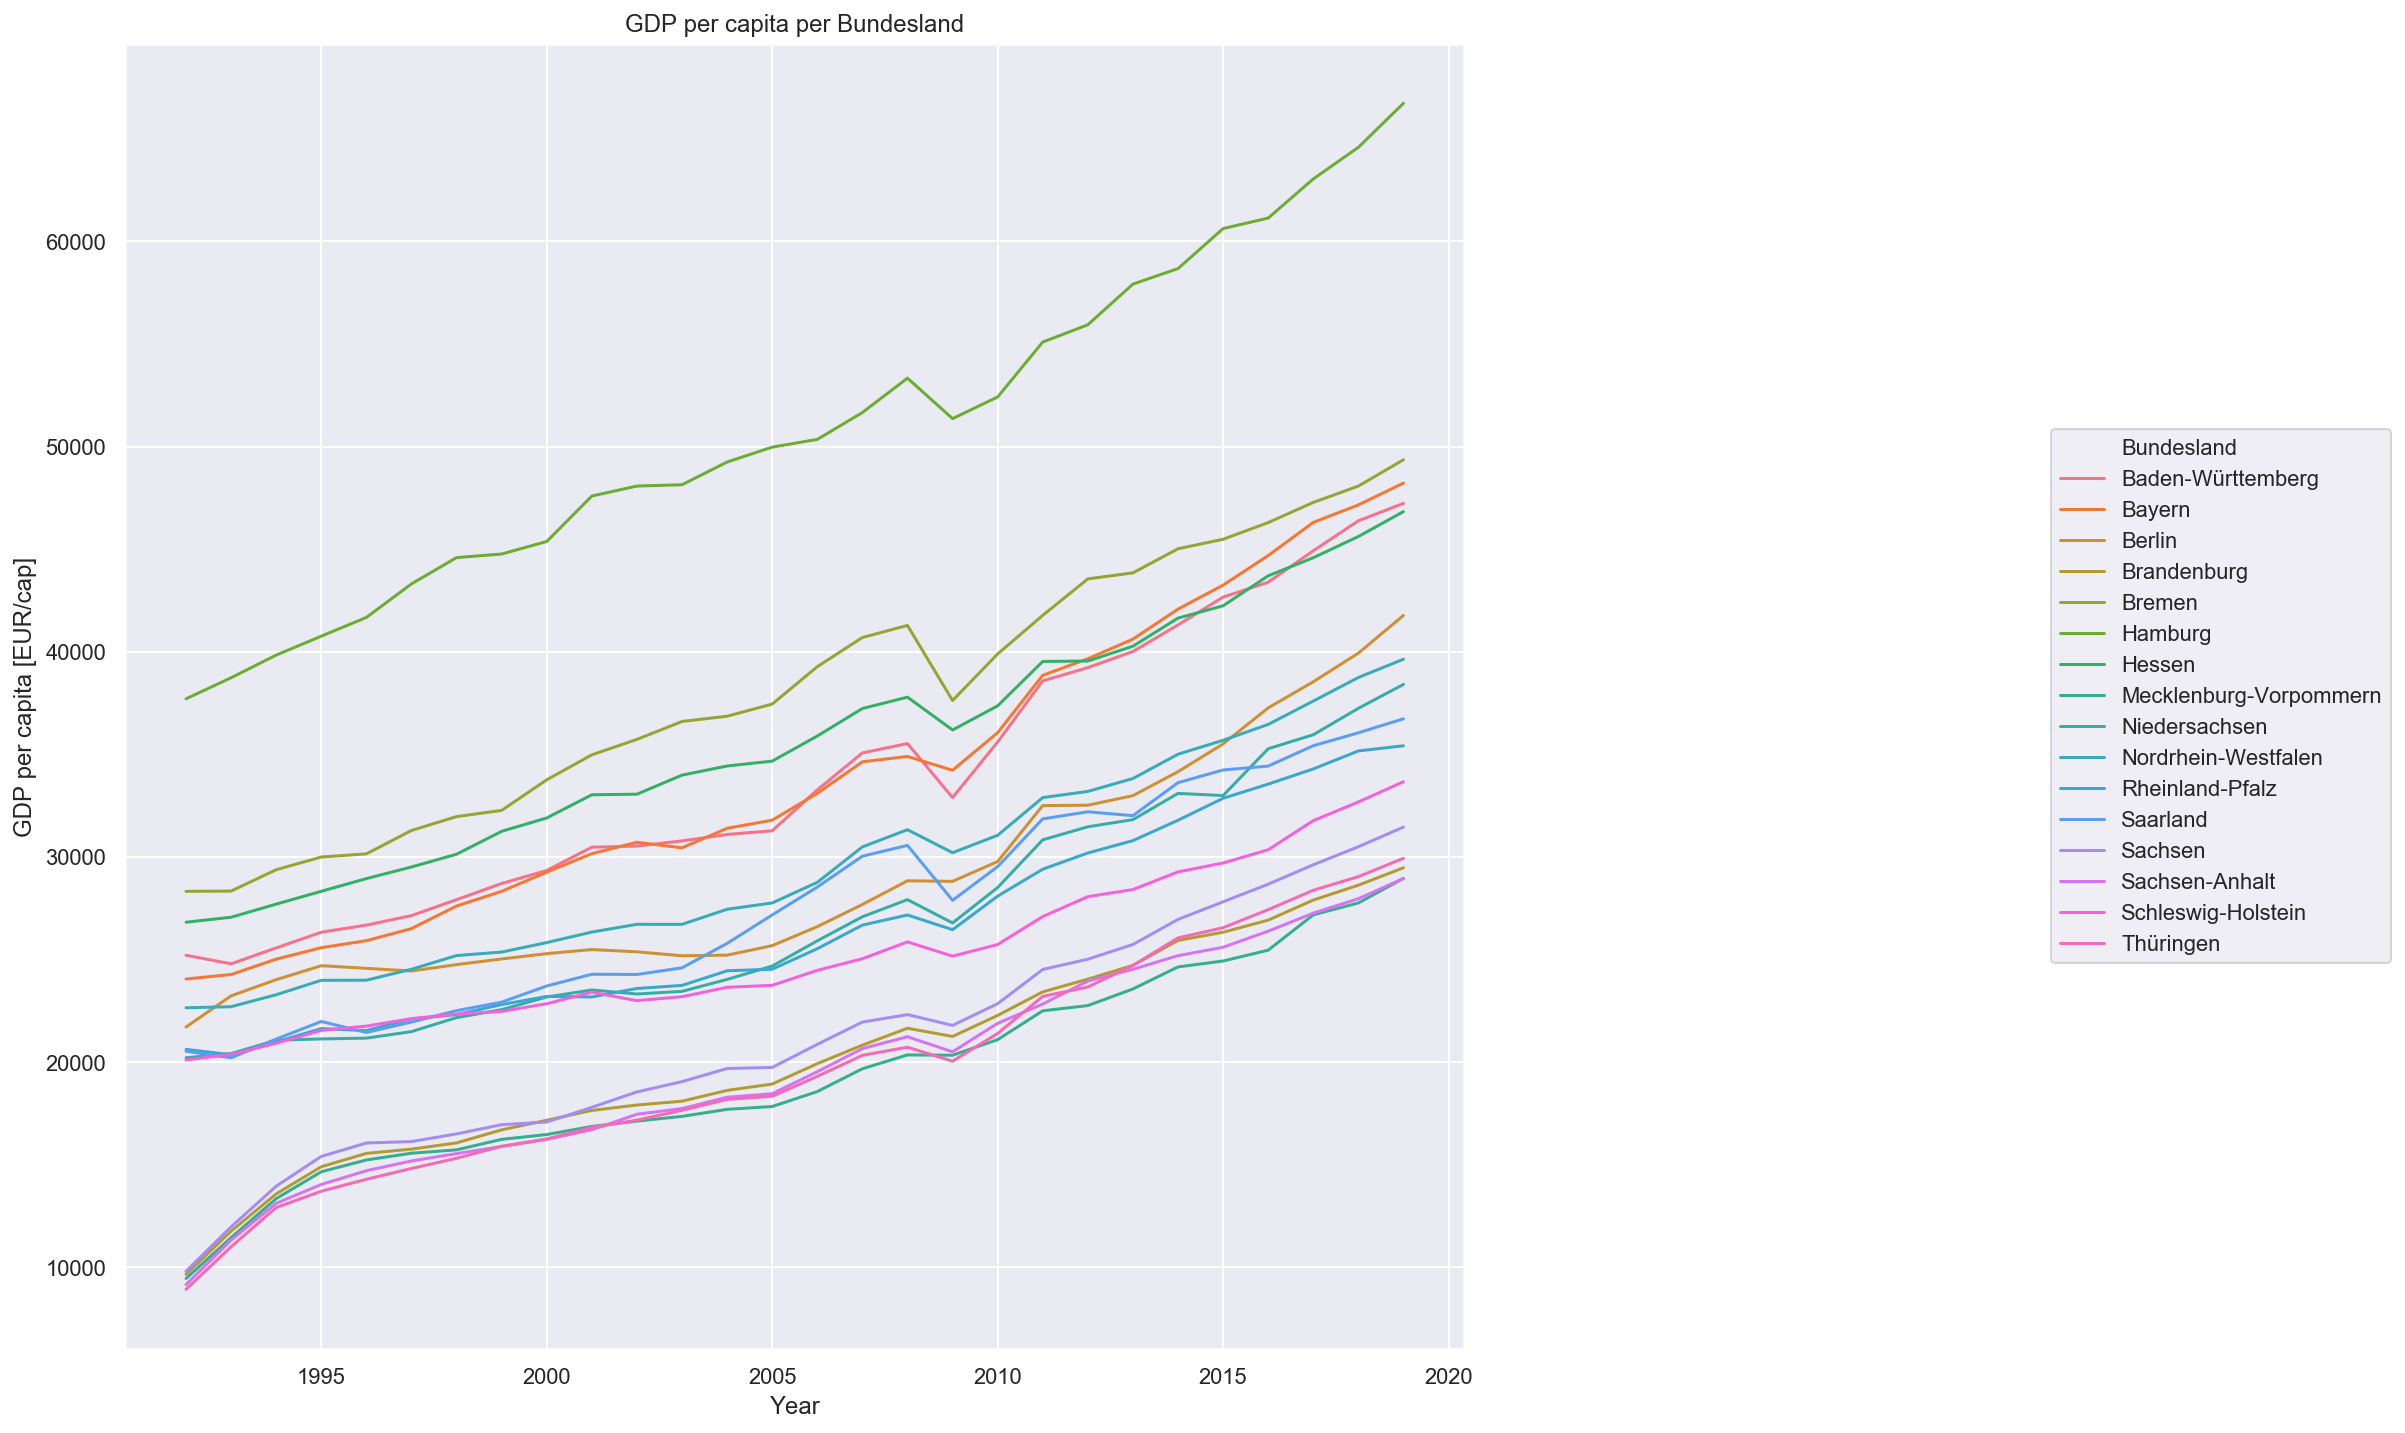

In [497]:
p3 = sns.lineplot(x="Year", y="GDP_pc", hue="Bundesland", data = data)
p3.legend(loc='center right', bbox_to_anchor=(1.7, 0.5), ncol=1)
p3.set(xlabel="Year",
       ylabel="GDP per capita [EUR/cap]",
       title= "GDP per capita per Bundesland")

[Text(0, 0.5, 'Population density [cap/km2]'),
 Text(0.5, 0, 'Year'),
 Text(0.5, 1.0, 'Population density per Bundesland')]

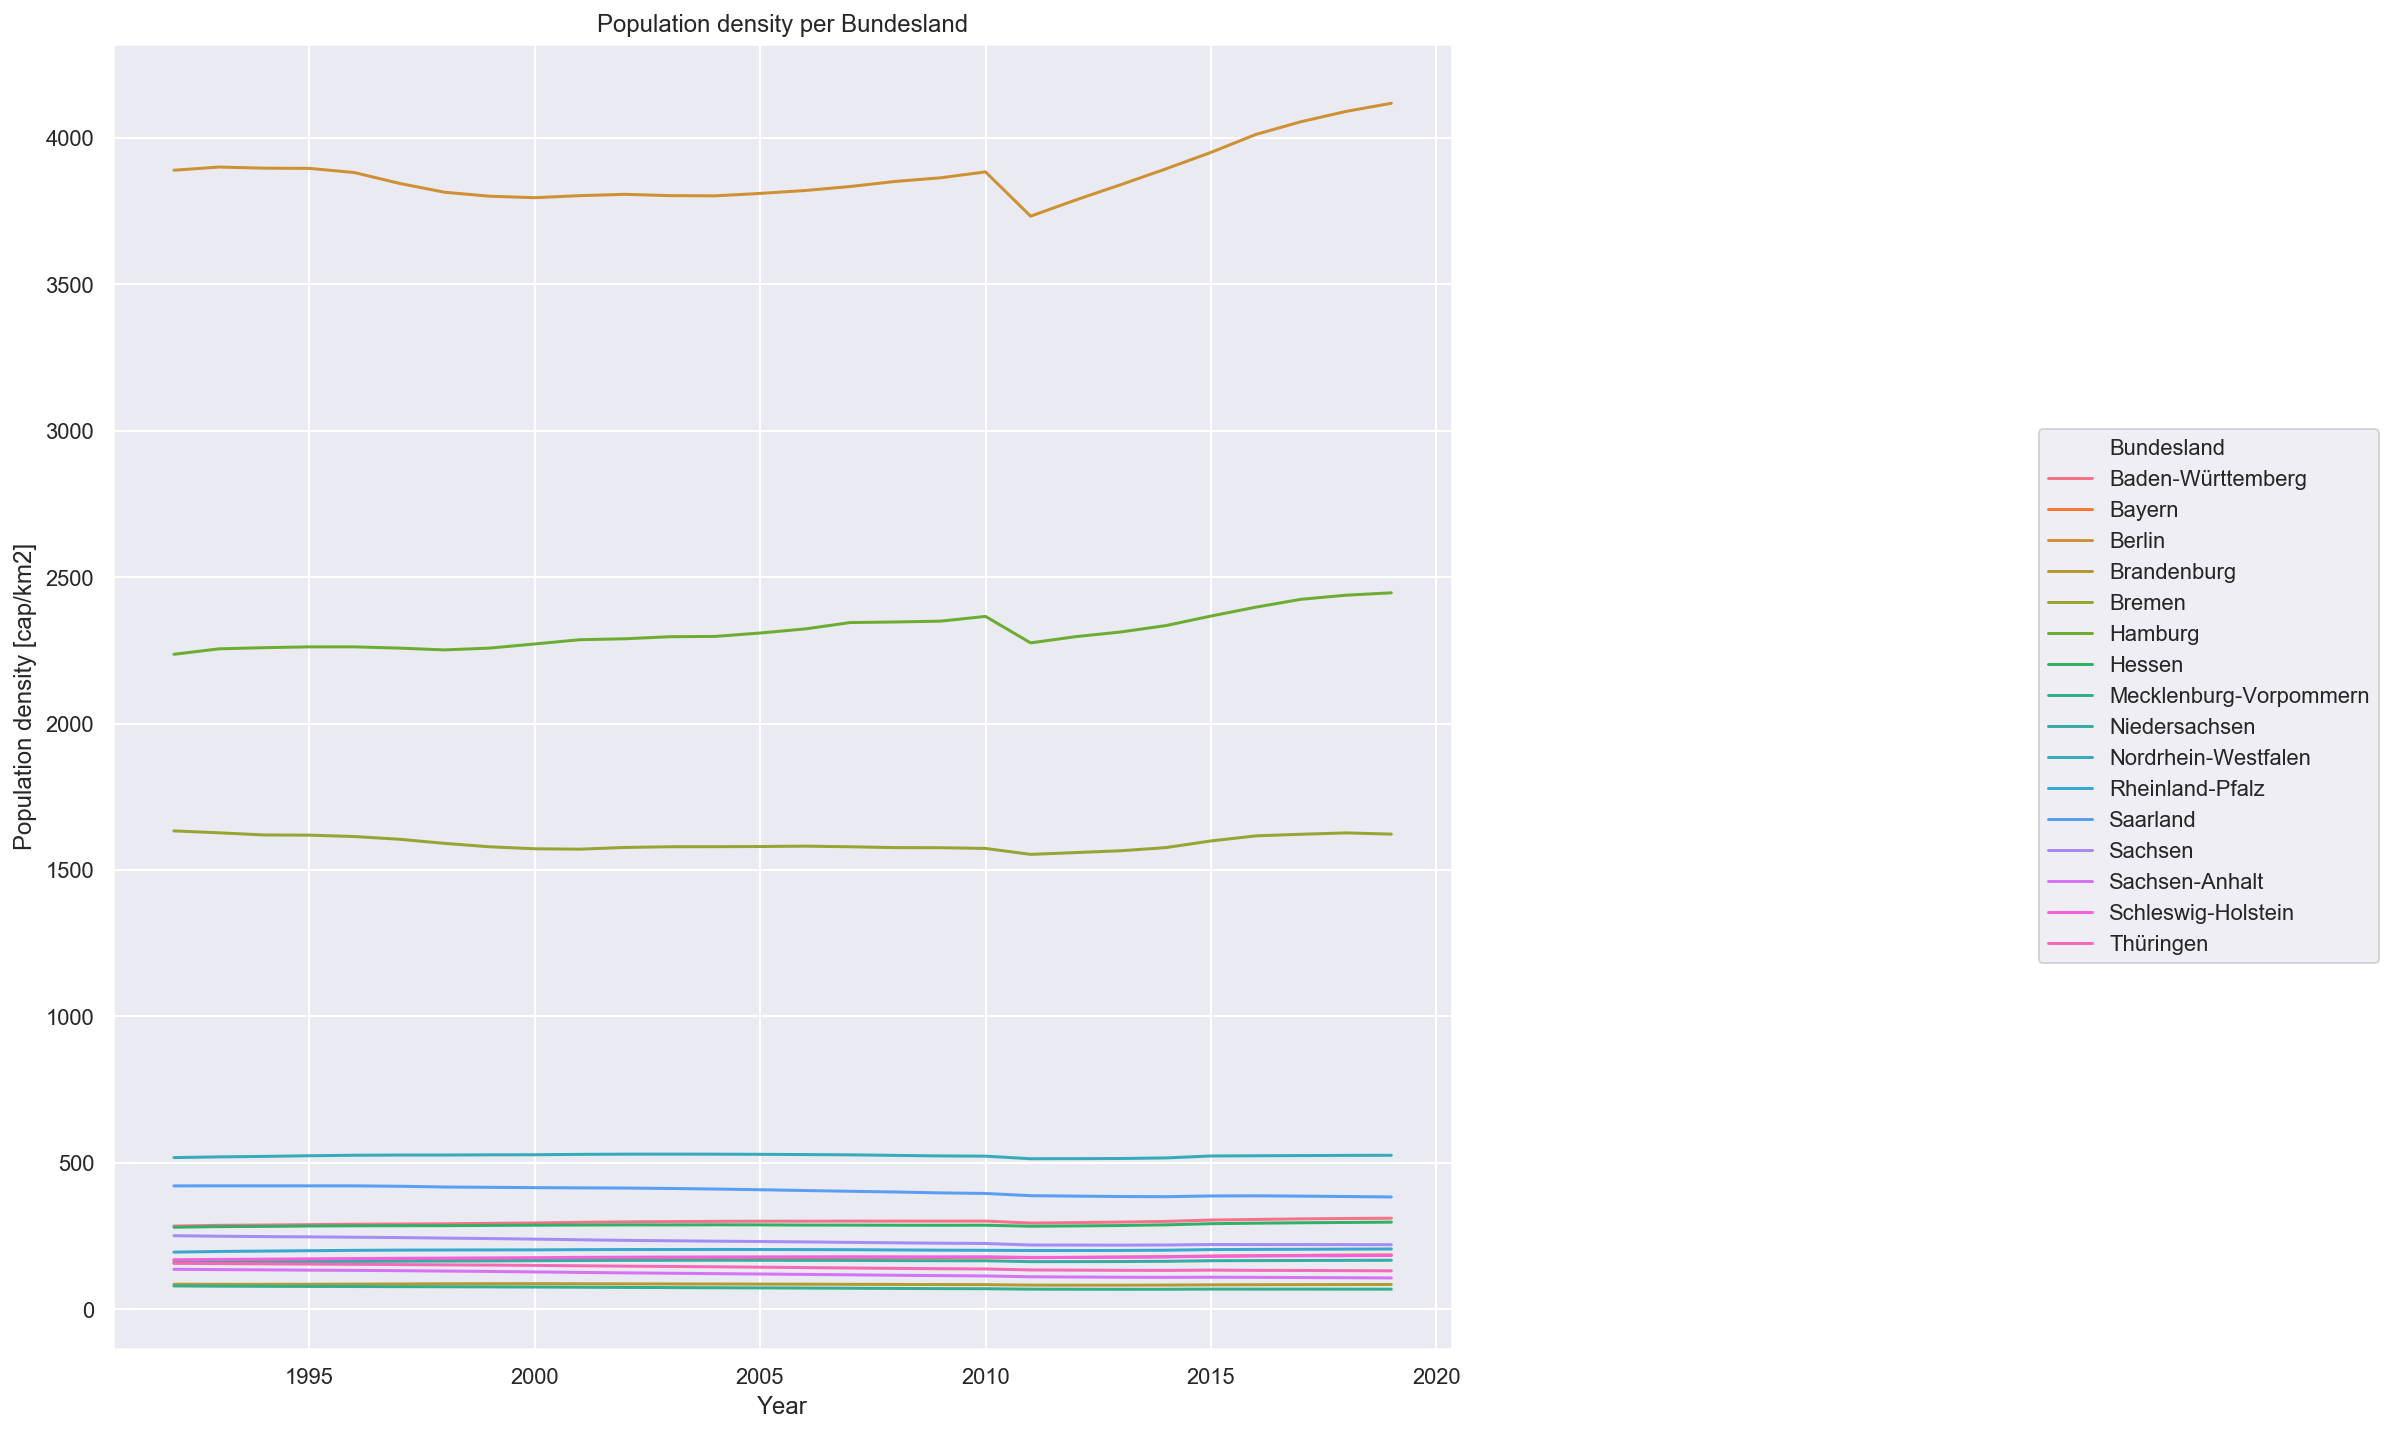

In [498]:
p4 = sns.lineplot(x="Year", y="pop_density", hue="Bundesland", data = data)
p4.legend(loc='center right', bbox_to_anchor=(1.7, 0.5), ncol=1)
p4.set(xlabel="Year",
       ylabel="Population density [cap/km2]",
       title= "Population density per Bundesland")

[Text(0, 0.5, 'Share [-]'),
 Text(0.5, 0, 'Year'),
 Text(0.5, 1.0, 'Share of green party in the parliament')]

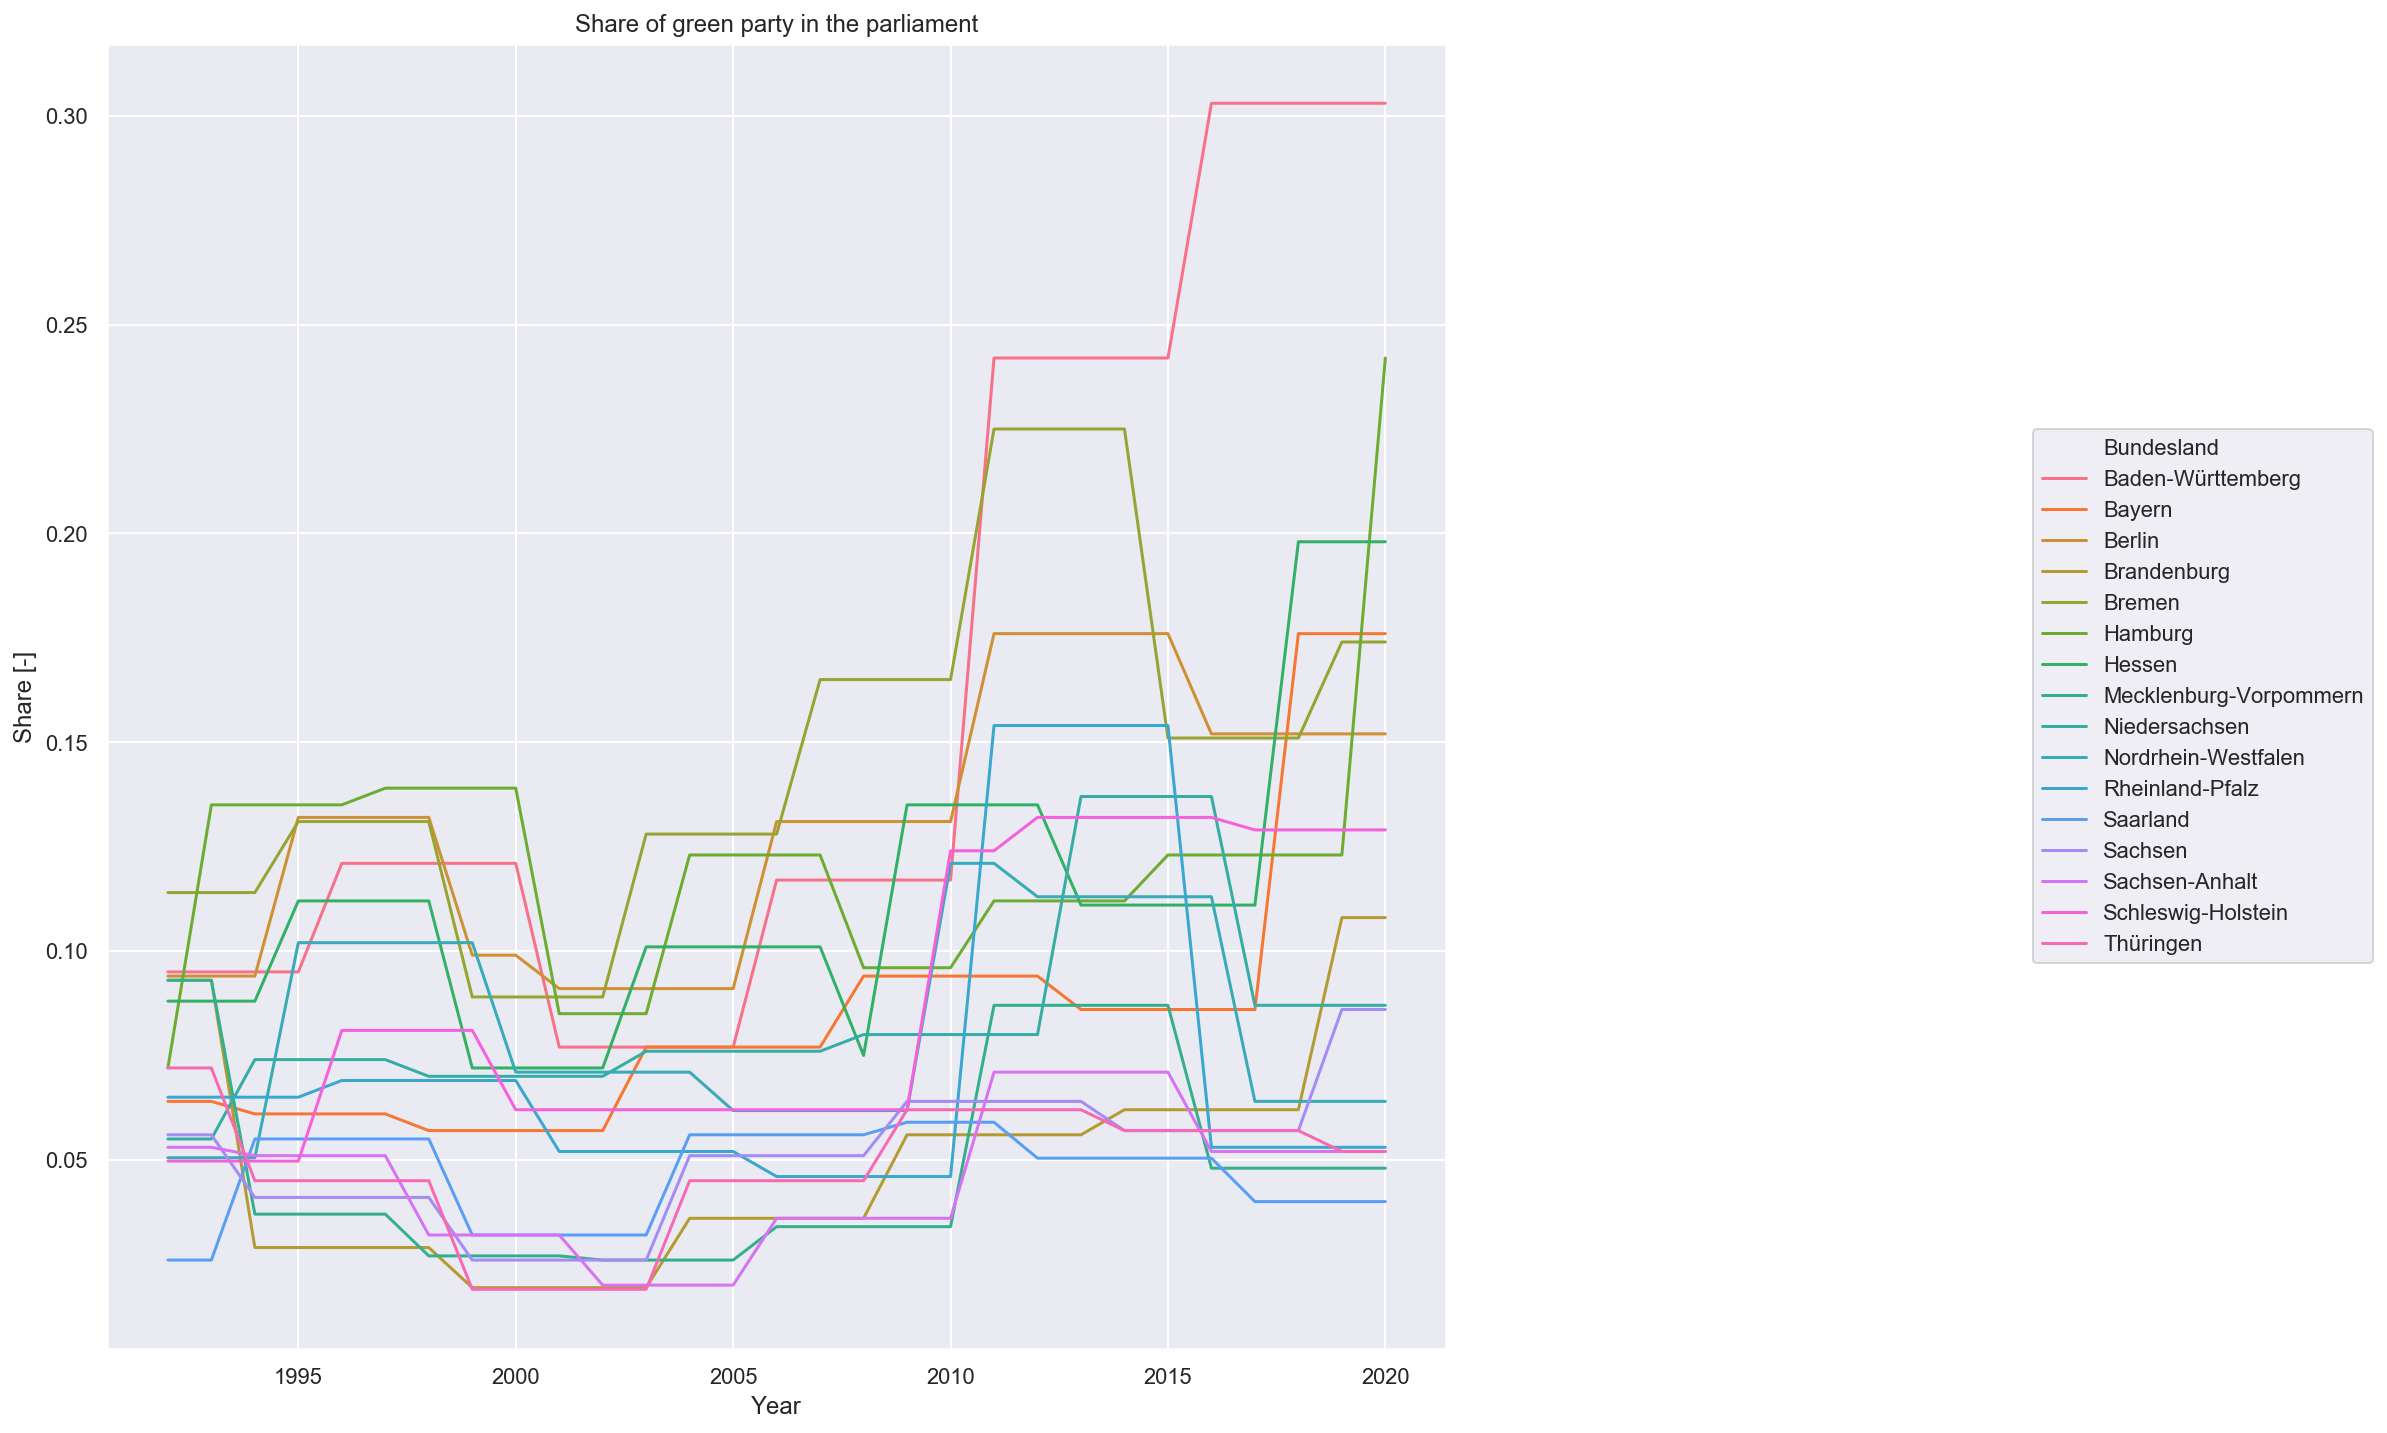

In [499]:
p5 = sns.lineplot(x="Year", y="share_green_party", hue="Bundesland", data = data)
p5.legend(loc='center right', bbox_to_anchor=(1.7, 0.5), ncol=1)
p5.set(xlabel="Year",
       ylabel="Share [-]",
       title= "Share of green party in the parliament")

## Data preparation for ML regressions

In [500]:
# filter to only work with complete data (balanced panel)
df1 = data[(data.Year>=1992) & (data.Year<2020)]
df1.head()

,Year,Bundesland,Installed_Cap,Installed_Cap_below_30,Cum_Installed_cap,Cum_Installed_Cap_below_30,module_cost,feed-in,population,area,log_area,GDP,Installed_Cap_pa,Cum_Installed_Cap_pa,Installed_Cap_below_30_pc,Cum_Installed_Cap_below_30_pc,Installed_Cap_pc,Cum_Installed_Cap_pc,pop_density,GDP_pc,solar_irradiance,sun_hours,share_green_party
0,1992,Baden-Württemberg,124.661,124.661,124.661,124.661,8.0,NaN,10148708.0,35673.71,10.482169,255866.0,0.003494,0.003494,0.012283,0.012283,0.012283,0.012283,284.487035,25211.682118,1100,1755,0.095
1,1992,Bayern,157.574,157.574,157.574,157.574,8.0,NaN,11770257.0,70542.03,11.163964,283121.0,0.002234,0.002234,0.013387,0.013387,0.013387,0.013387,166.854526,24053.935271,1180,1805,0.064
2,1992,Berlin,127.110,127.110,127.110,127.110,8.0,NaN,3465748.0,891.12,6.792479,75252.0,0.142641,0.142641,0.036676,0.036676,0.036676,0.036676,3889.204596,21713.061654,1009,1590,0.094
3,1992,Brandenburg,37.880,37.880,37.880,37.880,8.0,NaN,2542651.0,29654.38,10.297365,24556.0,0.001277,0.001277,0.014898,0.014898,0.014898,0.014898,85.742848,9657.636852,1005,1615,0.093
4,1992,Bremen,57.060,57.060,57.060,57.060,8.0,NaN,685845.0,419.84,6.039874,19427.0,0.135909,0.135909,0.083197,0.083197,0.083197,0.083197,1633.586604,28325.642091,980,1455,0.114


In [501]:
df1.tail()

,Year,Bundesland,Installed_Cap,Installed_Cap_below_30,Cum_Installed_cap,Cum_Installed_Cap_below_30,module_cost,feed-in,population,area,log_area,GDP,Installed_Cap_pa,Cum_Installed_Cap_pa,Installed_Cap_below_30_pc,Cum_Installed_Cap_below_30_pc,Installed_Cap_pc,Cum_Installed_Cap_pc,pop_density,GDP_pc,solar_irradiance,sun_hours,share_green_party
443,2019,Saarland,19777.684,7698.804,787983.029,287947.655,0.26,14.504167,986887.0,2571.10,7.852089,36253.0,7.692304,306.477006,7.801100,291.773683,20.040475,798.453145,383.838435,36734.702149,1060,1665,0.040
444,2019,Sachsen,235403.225,24544.416,3144144.199,412433.670,0.26,14.504167,4071971.0,18449.99,9.822819,128097.0,12.758989,170.414412,6.027650,101.286004,57.810634,772.143072,220.703155,31458.229933,1040,1630,0.086
445,2019,Sachsen-Anhalt,331173.524,18374.647,3959334.167,315434.272,0.26,14.504167,2194782.0,20452.14,9.925843,63545.0,16.192610,193.590214,8.371969,143.720092,150.891307,1803.976052,107.313073,28952.761595,1020,1555,0.052
446,2019,Schleswig-Holstein,114727.161,18513.801,2782539.566,574167.107,0.26,14.504167,2903773.0,15802.27,9.667909,97762.0,7.260170,176.084801,6.375774,197.731402,39.509687,958.249686,183.756701,33667.232253,975,1500,0.129
447,2019,Thüringen,192679.017,12265.767,2384504.505,303697.871,0.26,14.504167,2133378.0,16202.37,9.692913,63866.0,11.892027,147.170106,5.749458,142.355396,90.316398,1117.713085,131.670737,29936.560703,1000,1500,0.052


In [502]:
# extract list of bundeslaender
bundeslaender = df1['Bundesland'].unique()

# extract list of years
years = df1['Year'].unique()

print(bundeslaender)
print(bundeslaender.shape)
print(years)
print(years.shape)

['Baden-Württemberg' 'Bayern' 'Berlin' 'Brandenburg' 'Bremen' 'Hamburg'
 'Hessen' 'Mecklenburg-Vorpommern' 'Niedersachsen' 'Nordrhein-Westfalen'
 'Rheinland-Pfalz' 'Saarland' 'Sachsen' 'Sachsen-Anhalt'
 'Schleswig-Holstein' 'Thüringen']
(16,)
[1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005
 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019]
(28,)


The followin independent variables are used for ML prediction:
- Year
- Module costs (national) [2016EUR/Wp]
- Feed-in-Tariff (national) [ct/kWh]
- Population (sub-national) [capita]
- Area (sub-national) [km2]
- GDP per capita (sub-national) [EUR/cap]
- Solar irradiance (sub-national) [kWh/m2]
- Sun hours (sub-national) [hrs/m2]
- Share of the green party in parliament (sub-national) [0,1]
- Share of Renewable Energy on electricity production (sub-national) [0,1]
- Share of PV on electricity production (sub-national) [0,1]

National variables have the same values for all states (Bundesländer).

Sub-national variables describe regional differences and are unique for each state (Bundesland).

In [503]:
# X from datafram to array
X_full = df1[['Year','module_cost','feed-in','population','area','GDP_pc','solar_irradiance','sun_hours','share_green_party']].to_numpy()
# use both population and area, rather than population density only
X_full.shape

(448, 9)

In [504]:
# Bundeslaender from dataframe to array
Bundesland_full = df1['Bundesland'].to_numpy()
print(Bundesland_full.shape)

(448,)


The dependent outcome variable Y:
- Installed PV Capacity per capita for installations <30kW (sub-national) [W/cap]

In [505]:
# Y from datafram to array
Y_full = df1['Installed_Cap_below_30_pc'].to_numpy()
Y_full.shape

(448,)

In [506]:
# X from array to dataframe
X_df = pd.DataFrame(X_full, columns=['Year','module_cost','feed-in','population','area','GDP_pc','solar_irradiance','sun_hours','share_green_party'])
# Format year
X_df['Year'] = pd.to_datetime(X_df['Year'], format='%Y').dt.year
X_df.head()

,Year,module_cost,feed-in,population,area,GDP_pc,solar_irradiance,sun_hours,share_green_party
0,1992,8.0,NaN,10148708.0,35673.71,25211.682118,1100.0,1755.0,0.095
1,1992,8.0,NaN,11770257.0,70542.03,24053.935271,1180.0,1805.0,0.064
2,1992,8.0,NaN,3465748.0,891.12,21713.061654,1009.0,1590.0,0.094
3,1992,8.0,NaN,2542651.0,29654.38,9657.636852,1005.0,1615.0,0.093
4,1992,8.0,NaN,685845.0,419.84,28325.642091,980.0,1455.0,0.114


In [507]:
#check for missing values
print("Missing X values:", X_df.isnull().sum())
print("Missing Y values:", df1['Installed_Cap_below_30_pc'].isnull().sum())

Missing X values: Year                  0
module_cost           0
feed-in              96
population            0
area                  0
GDP_pc                0
solar_irradiance      0
sun_hours             0
share_green_party     0
dtype: int64
Missing Y values: 0


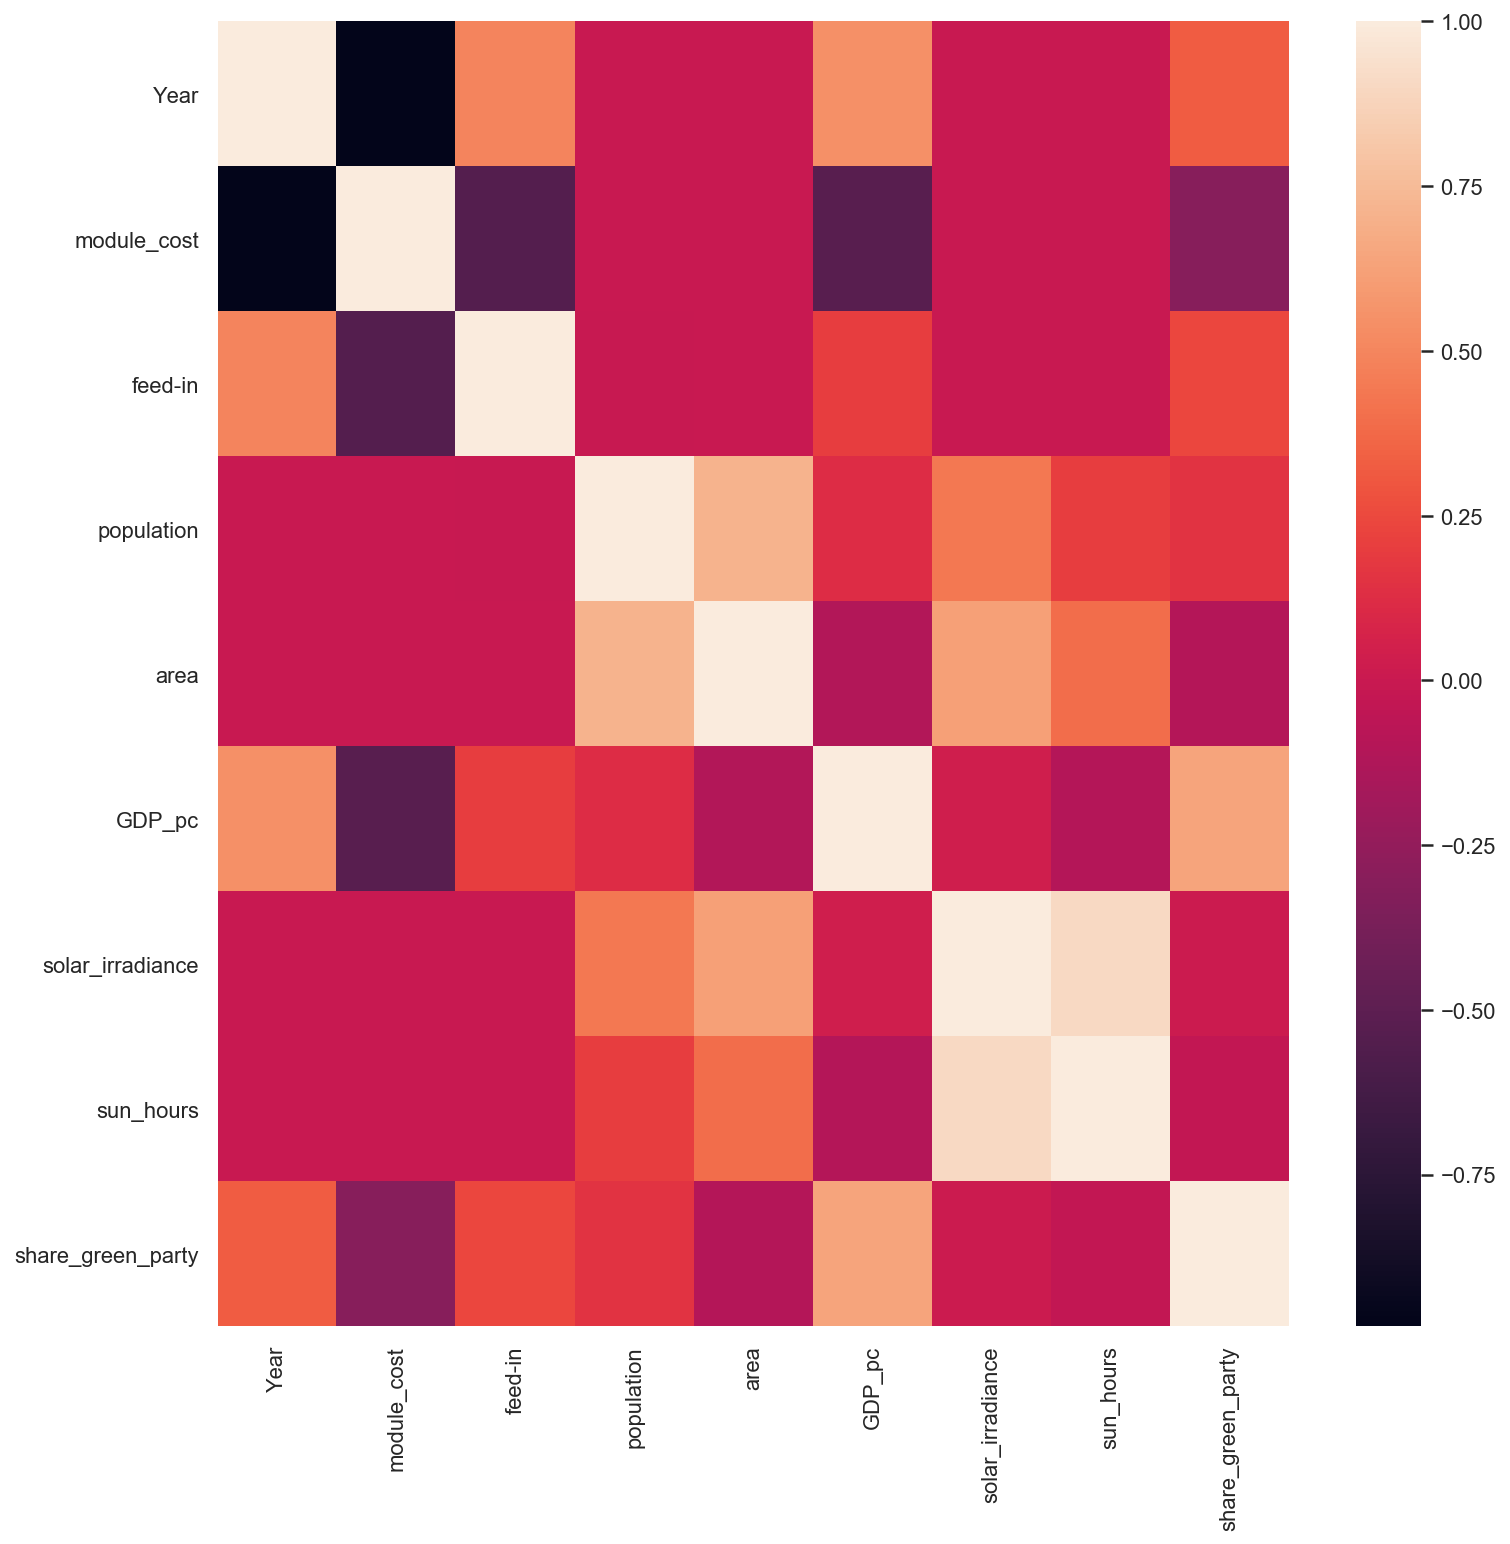

In [508]:
sns.set(rc={'figure.figsize':(12,12)})
correlation_matrix = X_df.corr().round(2)
sns.heatmap(correlation_matrix) #annot=True
plt.show()

## ML CODE

In [509]:
print("X_full", X_full.shape)
print("Y_full", Y_full.shape)

X_full (448, 9)
Y_full (448,)


In [510]:
X_df.head()

,Year,module_cost,feed-in,population,area,GDP_pc,solar_irradiance,sun_hours,share_green_party
0,1992,8.0,NaN,10148708.0,35673.71,25211.682118,1100.0,1755.0,0.095
1,1992,8.0,NaN,11770257.0,70542.03,24053.935271,1180.0,1805.0,0.064
2,1992,8.0,NaN,3465748.0,891.12,21713.061654,1009.0,1590.0,0.094
3,1992,8.0,NaN,2542651.0,29654.38,9657.636852,1005.0,1615.0,0.093
4,1992,8.0,NaN,685845.0,419.84,28325.642091,980.0,1455.0,0.114


In [544]:
## RE-LOADING THE DATA
# X from datafram to array
X_full = df1[['Year','module_cost','feed-in','population','area','GDP_pc','solar_irradiance','sun_hours','share_green_party']].to_numpy()
#X_full = df1[['Year','module_cost','feed-in','solar_irradiance','sun_hours','share_green_party']].to_numpy()
# use both population and area, rather than population density only
print(X_full.shape)

# Y from datafram to array
Y_full = df1['Installed_Cap_below_30_pc'].to_numpy()
print(Y_full.shape)

# Bundeslaender from dataframe to array
Bundesland_full = df1['Bundesland'].to_numpy()
print(Bundesland_full.shape)

# X from array to dataframe
X_df = pd.DataFrame(X_full, columns=['Year','module_cost','feed-in','population','area','GDP_pc','solar_irradiance','sun_hours','share_green_party'])
#X_df = pd.DataFrame(X_full, columns=['Year','module_cost','feed-in','solar_irradiance','sun_hours','share_green_party'])
# Format year
X_df['Year'] = pd.to_datetime(X_df['Year'], format='%Y').dt.year
X_df.head()

(448, 9)
(448,)
(448,)


,Year,module_cost,feed-in,population,area,GDP_pc,solar_irradiance,sun_hours,share_green_party
0,1992,8.0,NaN,10148708.0,35673.71,25211.682118,1100.0,1755.0,0.095
1,1992,8.0,NaN,11770257.0,70542.03,24053.935271,1180.0,1805.0,0.064
2,1992,8.0,NaN,3465748.0,891.12,21713.061654,1009.0,1590.0,0.094
3,1992,8.0,NaN,2542651.0,29654.38,9657.636852,1005.0,1615.0,0.093
4,1992,8.0,NaN,685845.0,419.84,28325.642091,980.0,1455.0,0.114


### Remove Data for better Model fit
Removing Year 2010

In [534]:
mask_year = np.logical_or.reduce((X_full[:,0]<2000, #when fit-data is shifted
                                  X_full[:,0]>2015))
                                  #X_full[:,0]==2011))

In [549]:
#when fit is shifted, no data on fit 1992-1998
mask_year = X_full[:,0]==2010

In [545]:
mask_year = X_full[:,0]<2000

In [550]:
Y_full=Y_full[mask_year==False]
X_full=X_full[mask_year==False]
X_df=X_df[mask_year==False]
Bundesland_full=Bundesland_full[mask_year==False]

print(X_full.shape)
print(Y_full.shape)
print(Bundesland_full.shape)

(304, 9)
(304,)
(304,)


### Data Split
data from years 1992 - 2019 (28 years)

train 75% or 21 years: from 1992 - 2012

test 25% or 7 years: from 2013 - 2019

In [551]:
# splitting the data
split = 2008
mask = X_full[:,0] >= split # TRUE for test data from split-year on
X_train = X_full[mask == False]
Y_train = Y_full[mask == False]

X_test = X_full[mask == True]
Y_test = Y_full[mask == True]

Bundesland_train = Bundesland_full[mask==False]
Bundesland_test = Bundesland_full[mask==True]

print("mask", mask.shape)
print("train data", X_train.shape, Y_train.shape)
print("test data", X_test.shape,  Y_test.shape)
print("bundeslaender in train data", Bundesland_train.shape)
print("bundeslaender in test data", Bundesland_test.shape)

mask (304,)
train data (128, 9) (128,)
test data (176, 9) (176,)
bundeslaender in train data (128,)
bundeslaender in test data (176,)


In [552]:
from sklearn.preprocessing import PolynomialFeatures
poly_features=PolynomialFeatures(degree=2)

X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.fit_transform(X_test)

lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, Y_train)

Y_train_pred = lin_reg.predict(X_train_poly)
Y_test_pred = lin_reg.predict(X_test_poly)

train_mse = mean_squared_error(Y_train, Y_train_pred)
train_rmse = np.sqrt(train_mse)

test_mse = mean_squared_error(Y_test,Y_test_pred)
test_rmse = np.sqrt(test_mse)

print("train RMS: %s" % train_rmse) 
print("test RMS: %s" % test_rmse) 
print("train R2: %s" % round(r2_score(Y_train, Y_train_pred), 2)) 
print("test R2: %s" % round(r2_score(Y_test, Y_test_pred), 2))

train RMS: 1.11844114118789
test RMS: 40.938720767353196
train R2: 0.95
test R2: -7.94


For plotting the results:

In [553]:
# create a new dataframe for plotting the results
Y = pd.DataFrame(df1, columns=['Year','Bundesland','Installed_Cap_below_30_pc'])

# create a new variable "Data" to classify the type of data
Y['Data'] = "$Y_i$ Installed Capacity"
Y = Y.rename(columns = {'Installed_Cap_below_30_pc':'Y'})
Y.head()

,Year,Bundesland,Y,Data
0,1992,Baden-Württemberg,0.012283,$Y_i$ Installed Capacity
1,1992,Bayern,0.013387,$Y_i$ Installed Capacity
2,1992,Berlin,0.036676,$Y_i$ Installed Capacity
3,1992,Brandenburg,0.014898,$Y_i$ Installed Capacity
4,1992,Bremen,0.083197,$Y_i$ Installed Capacity


In [554]:
# function for plotting fti quality
def plot_fit_quality(values_test, predicted):
    
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)

    x = np.arange(len(predicted))
    plt.scatter(x, predicted - values_test, color='steelblue', marker='o') 

    plt.plot([0, len(predicted)], [0, 0], "k:")
    
    max_diff = np.max(np.abs(predicted - values_test))
    plt.ylim([-max_diff, max_diff])
    
    plt.ylabel("error")
    plt.xlabel("sample id")

    plt.subplot(1, 2, 2)

    plt.scatter(x, (predicted - values_test) / values_test, color='steelblue', marker='o') 
    plt.plot([0, len(predicted)], [0, 0], "k:")
    plt.ylim([-.5, .5])
      
    plt.ylabel("relative error")
    plt.xlabel("sample id")

### Linear Regression

In [555]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)
features = list(X_df.columns)

from sklearn.metrics import mean_squared_error
Y_train_pred = lin_reg.predict(X_train)
train_mse = mean_squared_error(Y_train, Y_train_pred)
train_rmse = np.sqrt(train_mse)

Y_test_pred = lin_reg.predict(X_test)        
test_mse = mean_squared_error(Y_test, Y_test_pred)
test_rmse = np.sqrt(test_mse)

from sklearn.metrics import r2_score
r2 = round(r2_score(Y_test, Y_test_pred), 2)

from sklearn.metrics import explained_variance_score
exp_var = round(explained_variance_score(Y_test,Y_test_pred),2)

print('The coefficients of the features from the linear model:')
print(dict(zip(features, [round(x, 2) for x in lin_reg.coef_])))
print("R-squared for training dataset:{}".
      format(np.round(lin_reg.score(X_train, Y_train), 2)))
print("Train RMS: %s" % train_rmse) # = np.sqrt(np.mean((predicted - expected) ** 2))
print("Test RMS: %s" % test_rmse)
print("R2: %s" % r2)
print("Explained variance: %s" % exp_var)

The coefficients of the features from the linear model:
{'Year': 1.82, 'module_cost': 2.48, 'feed-in': -0.03, 'population': 0.0, 'area': 0.0, 'GDP_pc': 0.0, 'solar_irradiance': 0.02, 'sun_hours': 0.01, 'share_green_party': -1.32}
R-squared for training dataset:0.68
Train RMS: 2.979746184044227
Test RMS: 15.8330809841505
R2: -0.34
Explained variance: -0.29


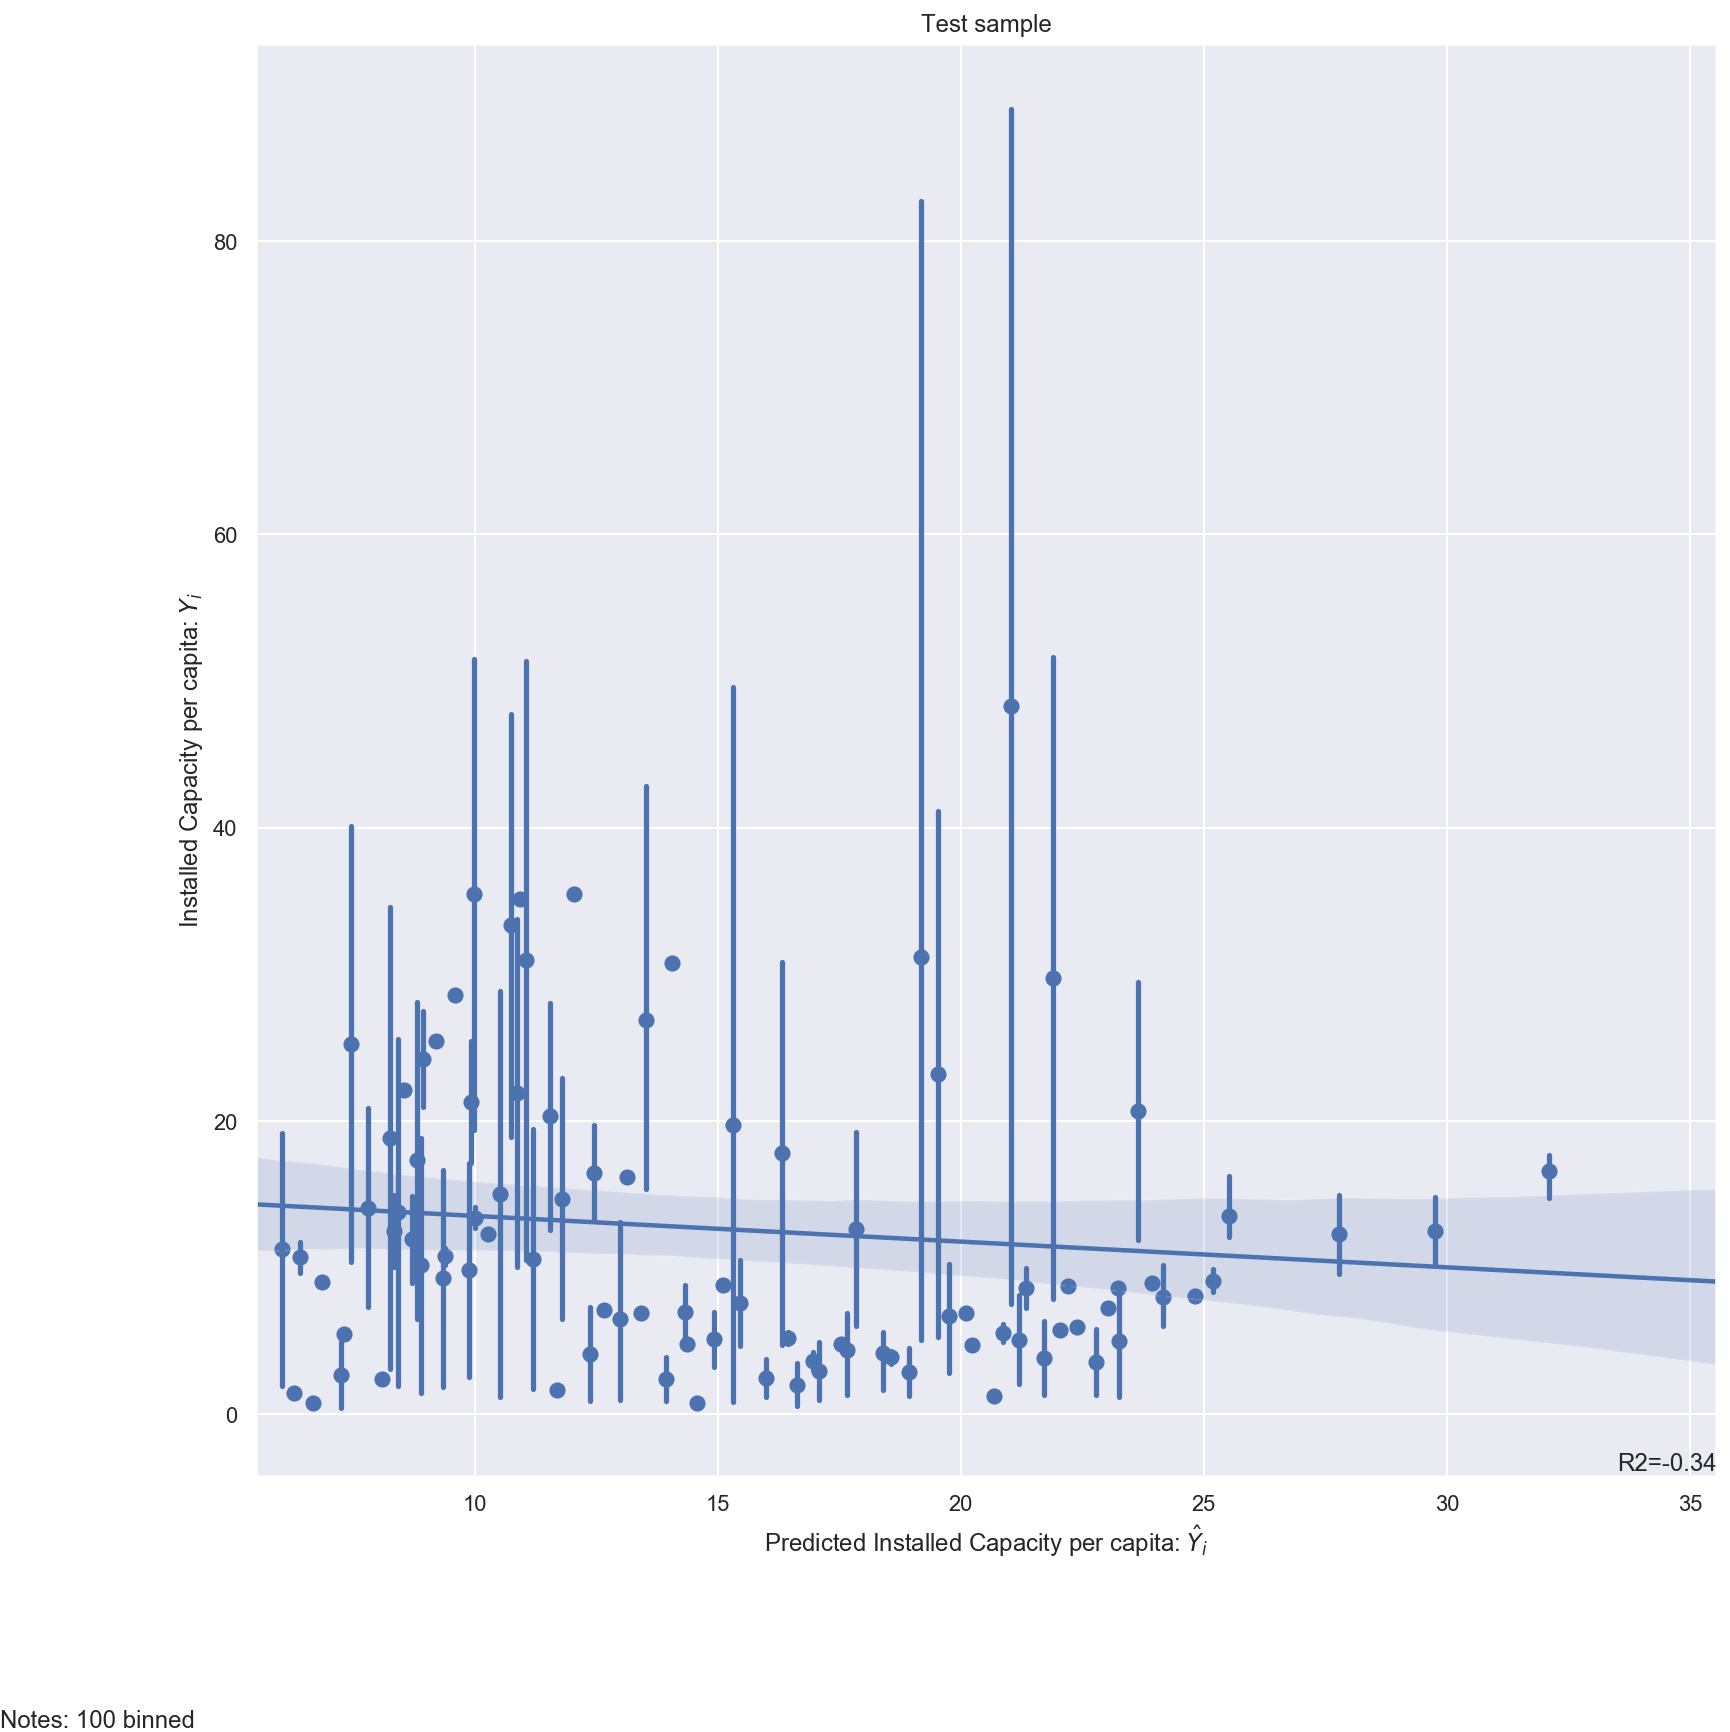

In [556]:
# Regplot
g=sns.regplot(x= Y_test_pred, y=Y_test, x_bins = 100)
g=g.set_title("Test sample")
plt.xlabel("Predicted Installed Capacity per capita: $\hat{Y}_i$")
plt.ylabel("Installed Capacity per capita: $Y_i$")
plt.annotate('R2={}'.format(r2),
            xy=(1, 0),  xycoords='axes fraction',
            horizontalalignment='right',
            verticalalignment='bottom')
plt.annotate('Notes: 100 binned',
            xy=(0, 0),  xycoords='figure fraction',
            horizontalalignment='left',
            verticalalignment='bottom')
#plt.plot([-10000, 300000], [-10000, 300000], '--k')
plt.axis('tight')
plt.tight_layout()
plt.show(g)

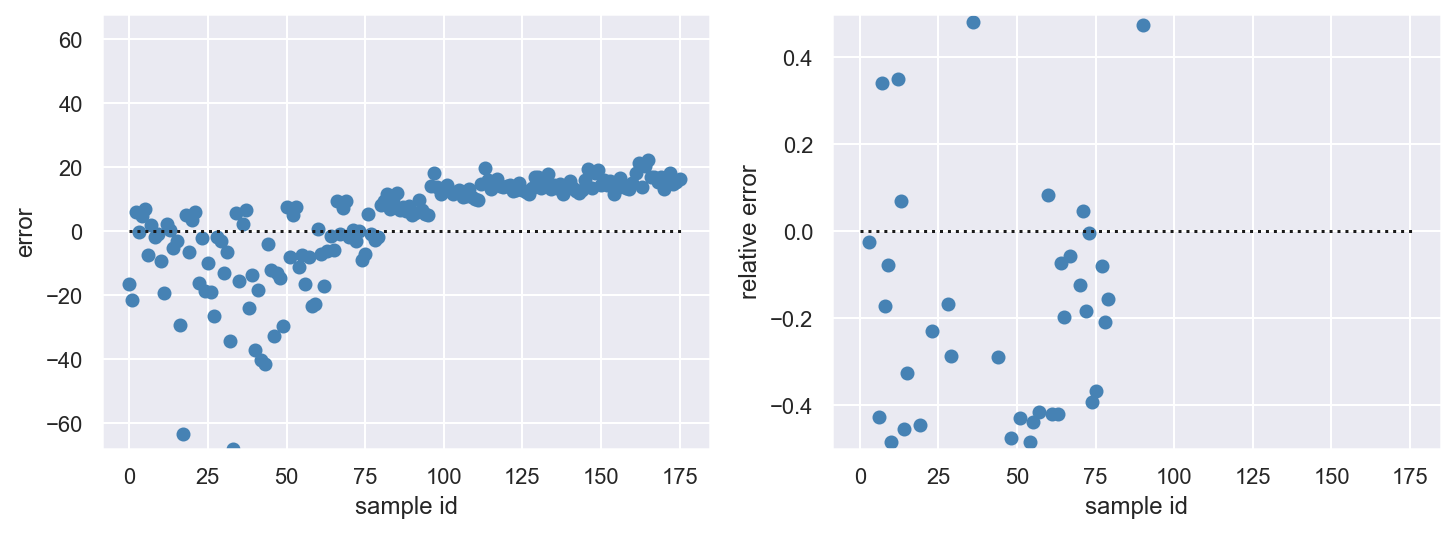

In [557]:
plot_fit_quality(Y_test, Y_test_pred)

[Text(0, 0.5, 'Installed Capacity per capita [W/cap]'),
 Text(0.5, 0, 'Year'),
 Text(0.5, 1.0, 'Annually Installed PV Capacity per capita in Germany [<30kW]')]

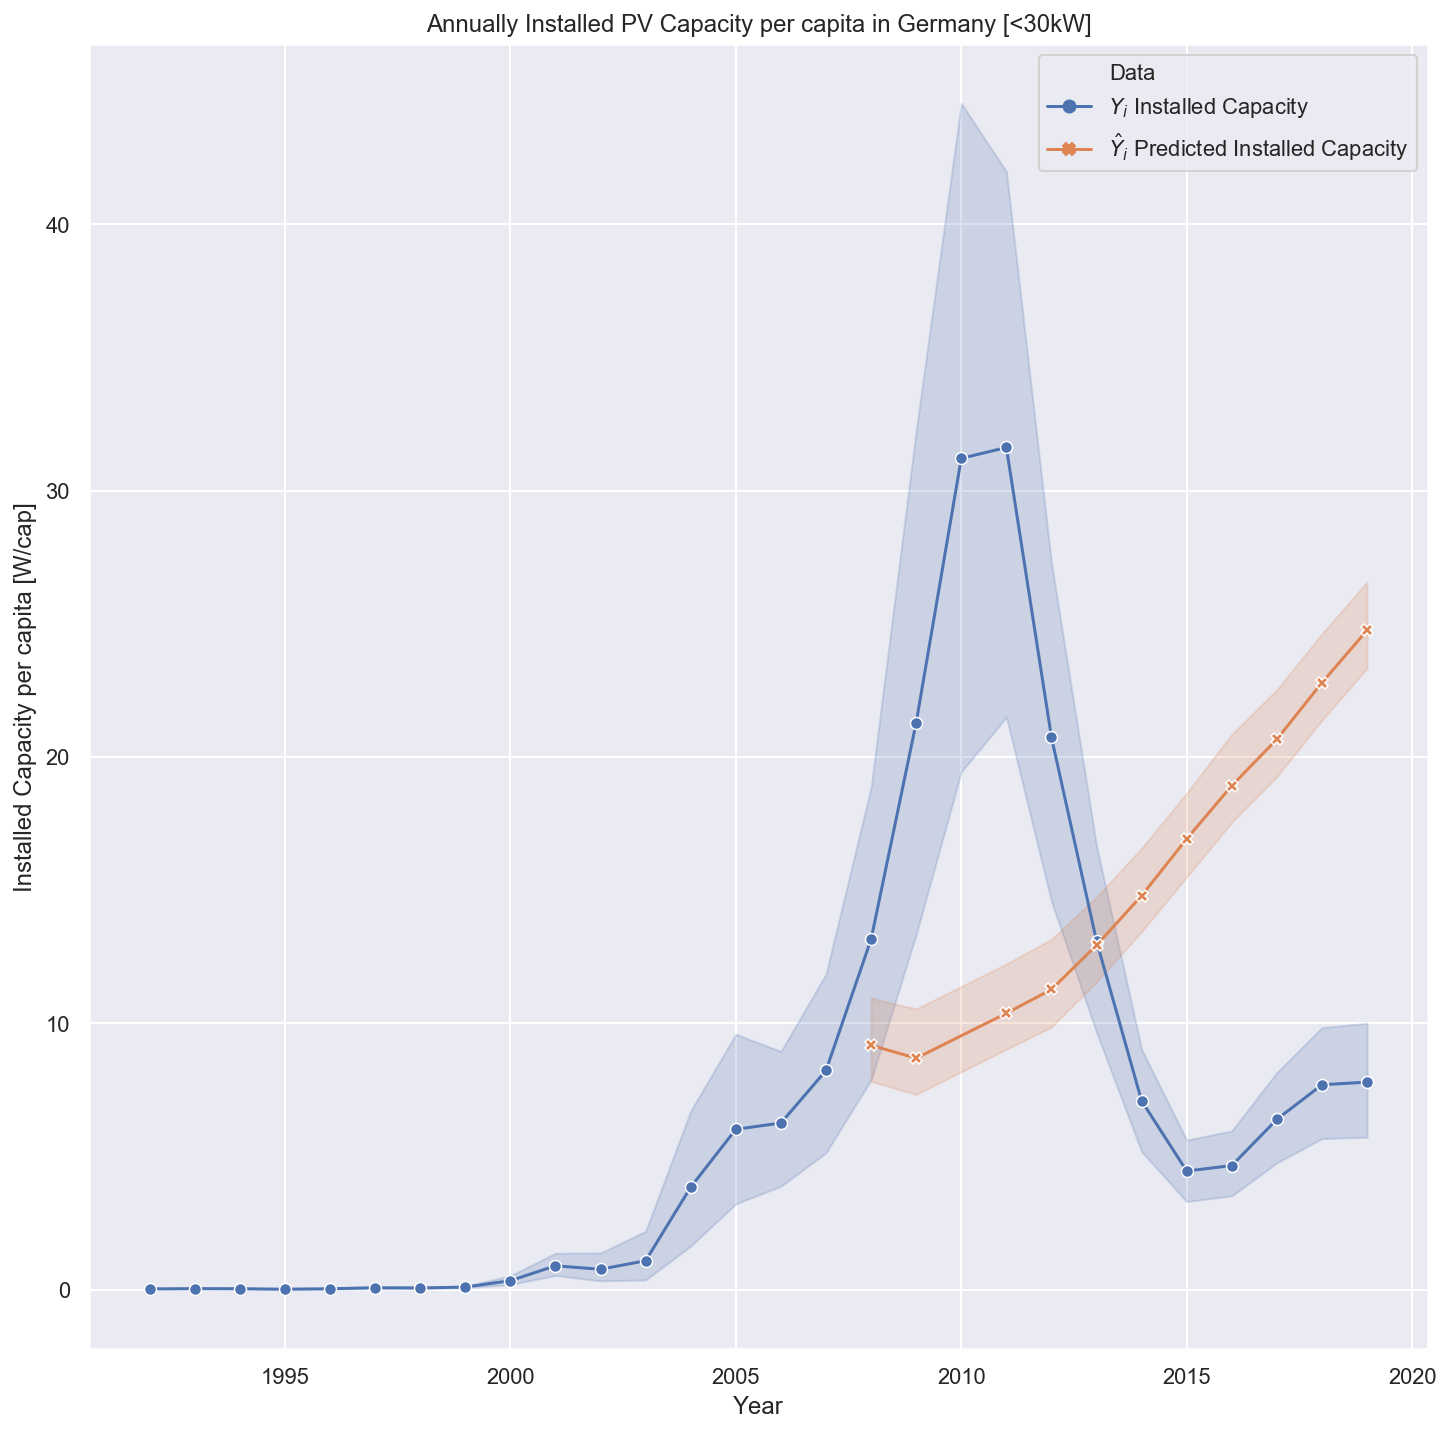

In [558]:
# extract the predicted data into a dataframe
df_pred = np.column_stack((Bundesland_test,X_test[:,0],Y_test,Y_test_pred))
df_pred = pd.DataFrame(df_pred, columns=['Bundesland','Year','Y_test','Y_test_pred'])

# adjust data types
df_pred['Year'] = df_pred['Year'].astype(int)
df_pred['Y_test'] = df_pred['Y_test'].astype(float)
df_pred['Y_test_pred'] = df_pred['Y_test_pred'].astype(float)

# create a new dataframe for plotting the results
df_pred_plot = pd.DataFrame(df_pred, columns=['Bundesland','Year','Y_test_pred'])

# create a new variable "Data" to classify the type of data
df_pred_plot['Data'] = "$\hat{Y}_i$ Predicted Installed Capacity"
df_pred_plot = df_pred_plot.rename(columns = {'Y_test_pred':'Y'})

# merge two data frames with actual and predicted data together
df_plot = pd.merge(Y, df_pred_plot , how='outer', on=['Year','Bundesland','Y','Data'])
df_plot = df_plot.sort_values(by=['Year','Bundesland'])

# plot the results
ax = sns.lineplot(x="Year", y="Y", hue="Data", style="Data", markers=True, dashes=False,
                  data=df_plot)
ax.set(xlabel="Year",
       ylabel="Installed Capacity per capita [W/cap]",
       title= "Annually Installed PV Capacity per capita in Germany [<30kW]")

### Ridge Regression

In [522]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1)       
ridge_reg.fit(X_train, Y_train)

Y_train_pred = ridge_reg.predict(X_train)
Y_test_pred = ridge_reg.predict(X_test) 

train_mse = mean_squared_error(Y_train, Y_train_pred)
train_rmse = np.sqrt(train_mse)

test_mse = mean_squared_error(Y_test, Y_test_pred)
test_rmse = np.sqrt(test_mse)

print("train RMS: %s" % train_rmse) 
print("test RMS: %s" % test_rmse) 
print("train R2: %s" % round(r2_score(Y_train, Y_train_pred), 4)) 
print("test R2: %s" % round(r2_score(Y_test, Y_test_pred), 4)) 

train RMS: 3.0342081762481787
test RMS: 18.878273669671756
train R2: 0.6132
test R2: -0.1018


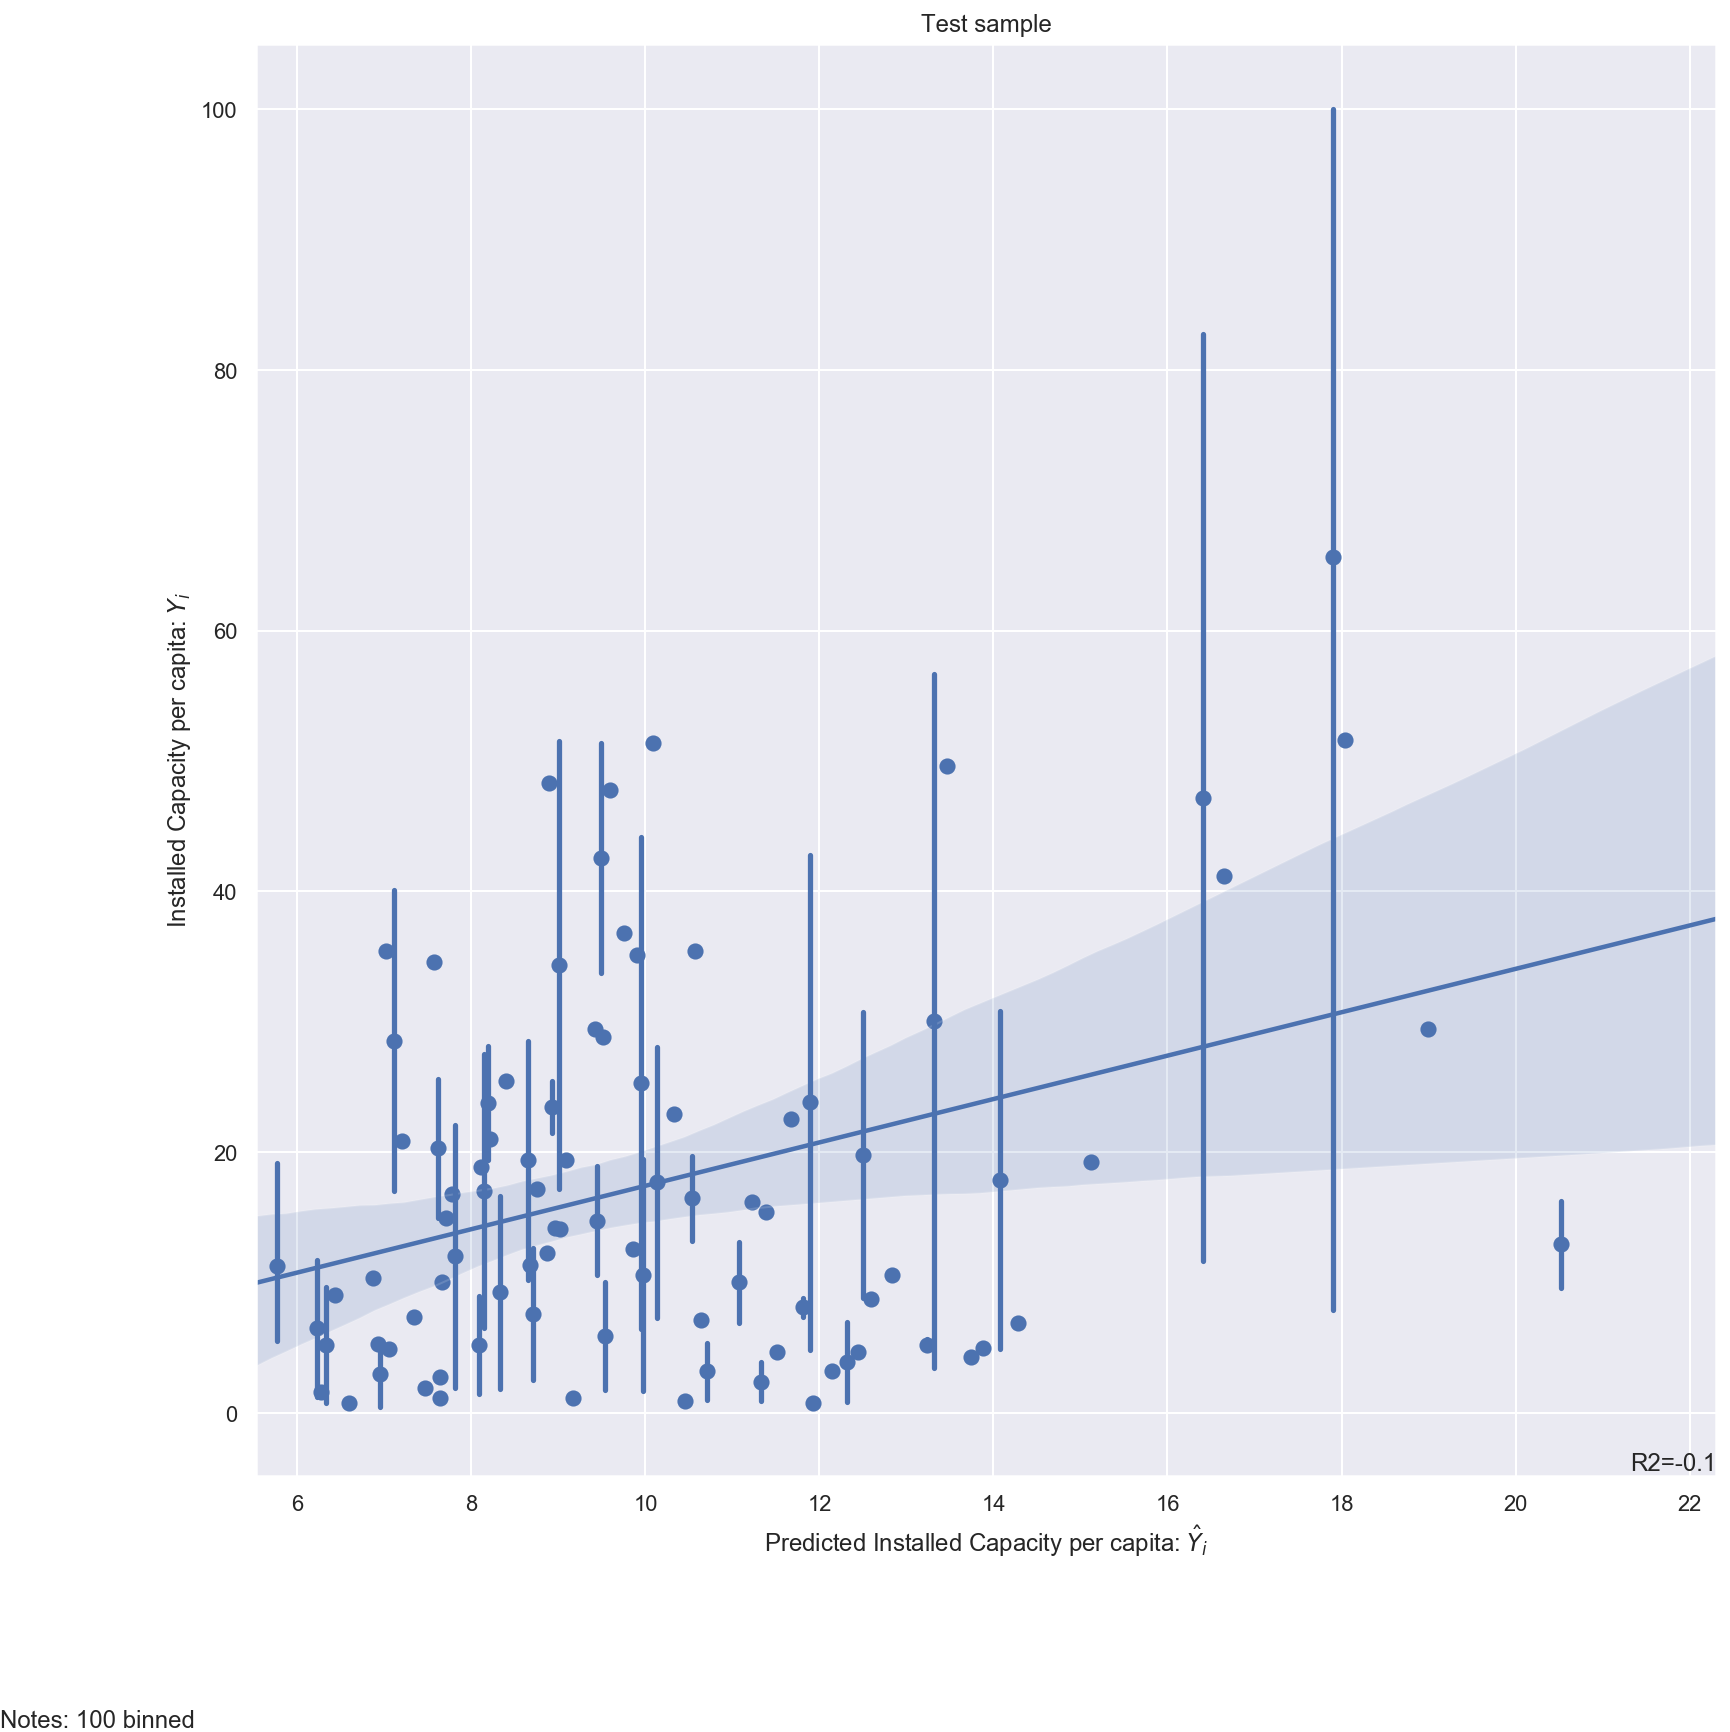

In [523]:
r2 = r2=round(r2_score(Y_test, Y_test_pred), 2)

# Regplot (code taken from the lecture Notebook W3)
g=sns.regplot(x= Y_test_pred, y=Y_test, x_bins = 100)
g=g.set_title("Test sample")
plt.xlabel("Predicted Installed Capacity per capita: $\hat{Y}_i$")
plt.ylabel("Installed Capacity per capita: $Y_i$")
plt.annotate('R2={}'.format(r2),
            xy=(1, 0),  xycoords='axes fraction',
            horizontalalignment='right',
            verticalalignment='bottom')
plt.annotate('Notes: 100 binned',
            xy=(0, 0),  xycoords='figure fraction',
            horizontalalignment='left',
            verticalalignment='bottom')
#plt.plot([110, 145], [110, 145], '--k')
plt.axis('tight')
plt.tight_layout()
plt.show(g)

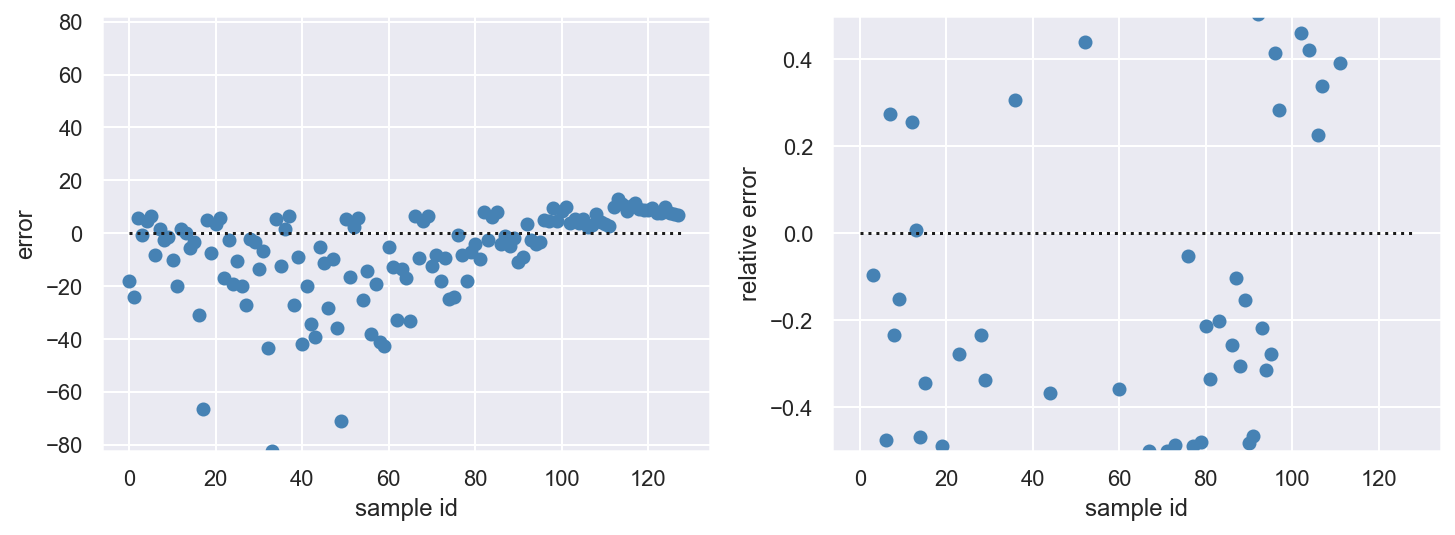

In [524]:
plot_fit_quality(Y_test, Y_test_pred)

[Text(0, 0.5, 'Installed Capacity per capita [W/cap]'),
 Text(0.5, 0, 'Year'),
 Text(0.5, 1.0, 'Annually Installed PV Capacity per capita in Germany [<30kW]')]

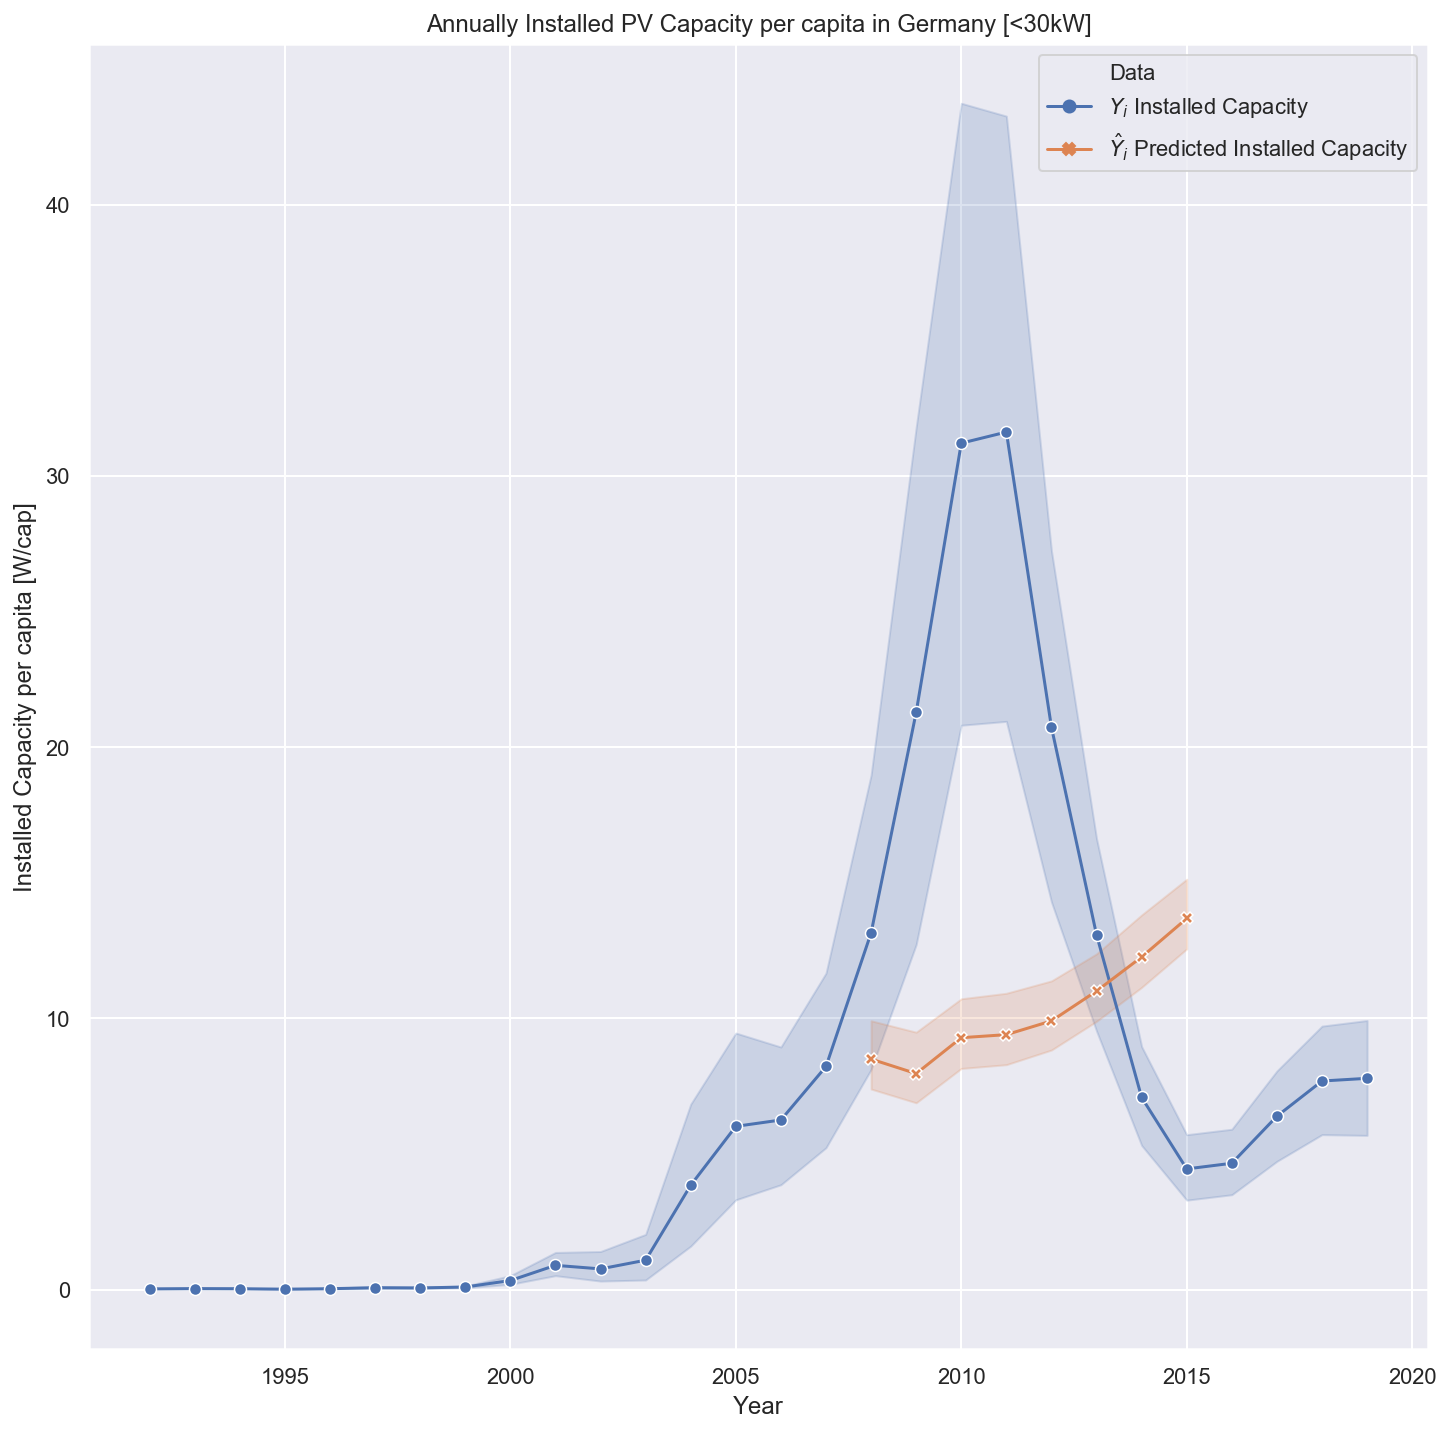

In [525]:
# extract the predicted data into a dataframe
df_pred = np.column_stack((Bundesland_test,X_test[:,0],Y_test,Y_test_pred))
df_pred = pd.DataFrame(df_pred, columns=['Bundesland','Year','Y_test','Y_test_pred'])

# adjust data types
df_pred['Year'] = df_pred['Year'].astype(int)
df_pred['Y_test'] = df_pred['Y_test'].astype(float)
df_pred['Y_test_pred'] = df_pred['Y_test_pred'].astype(float)

# create a new dataframe for plotting the results
df_pred_plot = pd.DataFrame(df_pred, columns=['Bundesland','Year','Y_test_pred'])

# create a new variable "Data" to classify the type of data
df_pred_plot['Data'] = "$\hat{Y}_i$ Predicted Installed Capacity"
df_pred_plot = df_pred_plot.rename(columns = {'Y_test_pred':'Y'})

# merge two data frames with actual and predicted data together
df_plot = pd.merge(Y, df_pred_plot , how='outer', on=['Year','Bundesland','Y','Data'])
df_plot = df_plot.sort_values(by=['Year','Bundesland'])

# plot the results
ax = sns.lineplot(x="Year", y="Y", hue="Data", style="Data", markers=True, dashes=False,
                  data=df_plot)
ax.set(xlabel="Year",
       ylabel="Installed Capacity per capita [W/cap]",
       title= "Annually Installed PV Capacity per capita in Germany [<30kW]")

### Polynomial Regression

In [526]:
from sklearn.preprocessing import PolynomialFeatures
poly_features=PolynomialFeatures(degree=2)

X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.fit_transform(X_test)

lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, Y_train)

Y_train_pred = lin_reg.predict(X_train_poly)
Y_test_pred = lin_reg.predict(X_test_poly)

train_mse = mean_squared_error(Y_train, Y_train_pred)
train_rmse = np.sqrt(train_mse)

test_mse = mean_squared_error(Y_test,Y_test_pred)
test_rmse = np.sqrt(test_mse)

print("train RMS: %s" % train_rmse) 
print("test RMS: %s" % test_rmse) 
print("train R2: %s" % round(r2_score(Y_train, Y_train_pred), 2)) 
print("test R2: %s" % round(r2_score(Y_test, Y_test_pred), 2))

train RMS: 1.8474415358657432
test RMS: 16.4432012505808
train R2: 0.86
test R2: 0.16


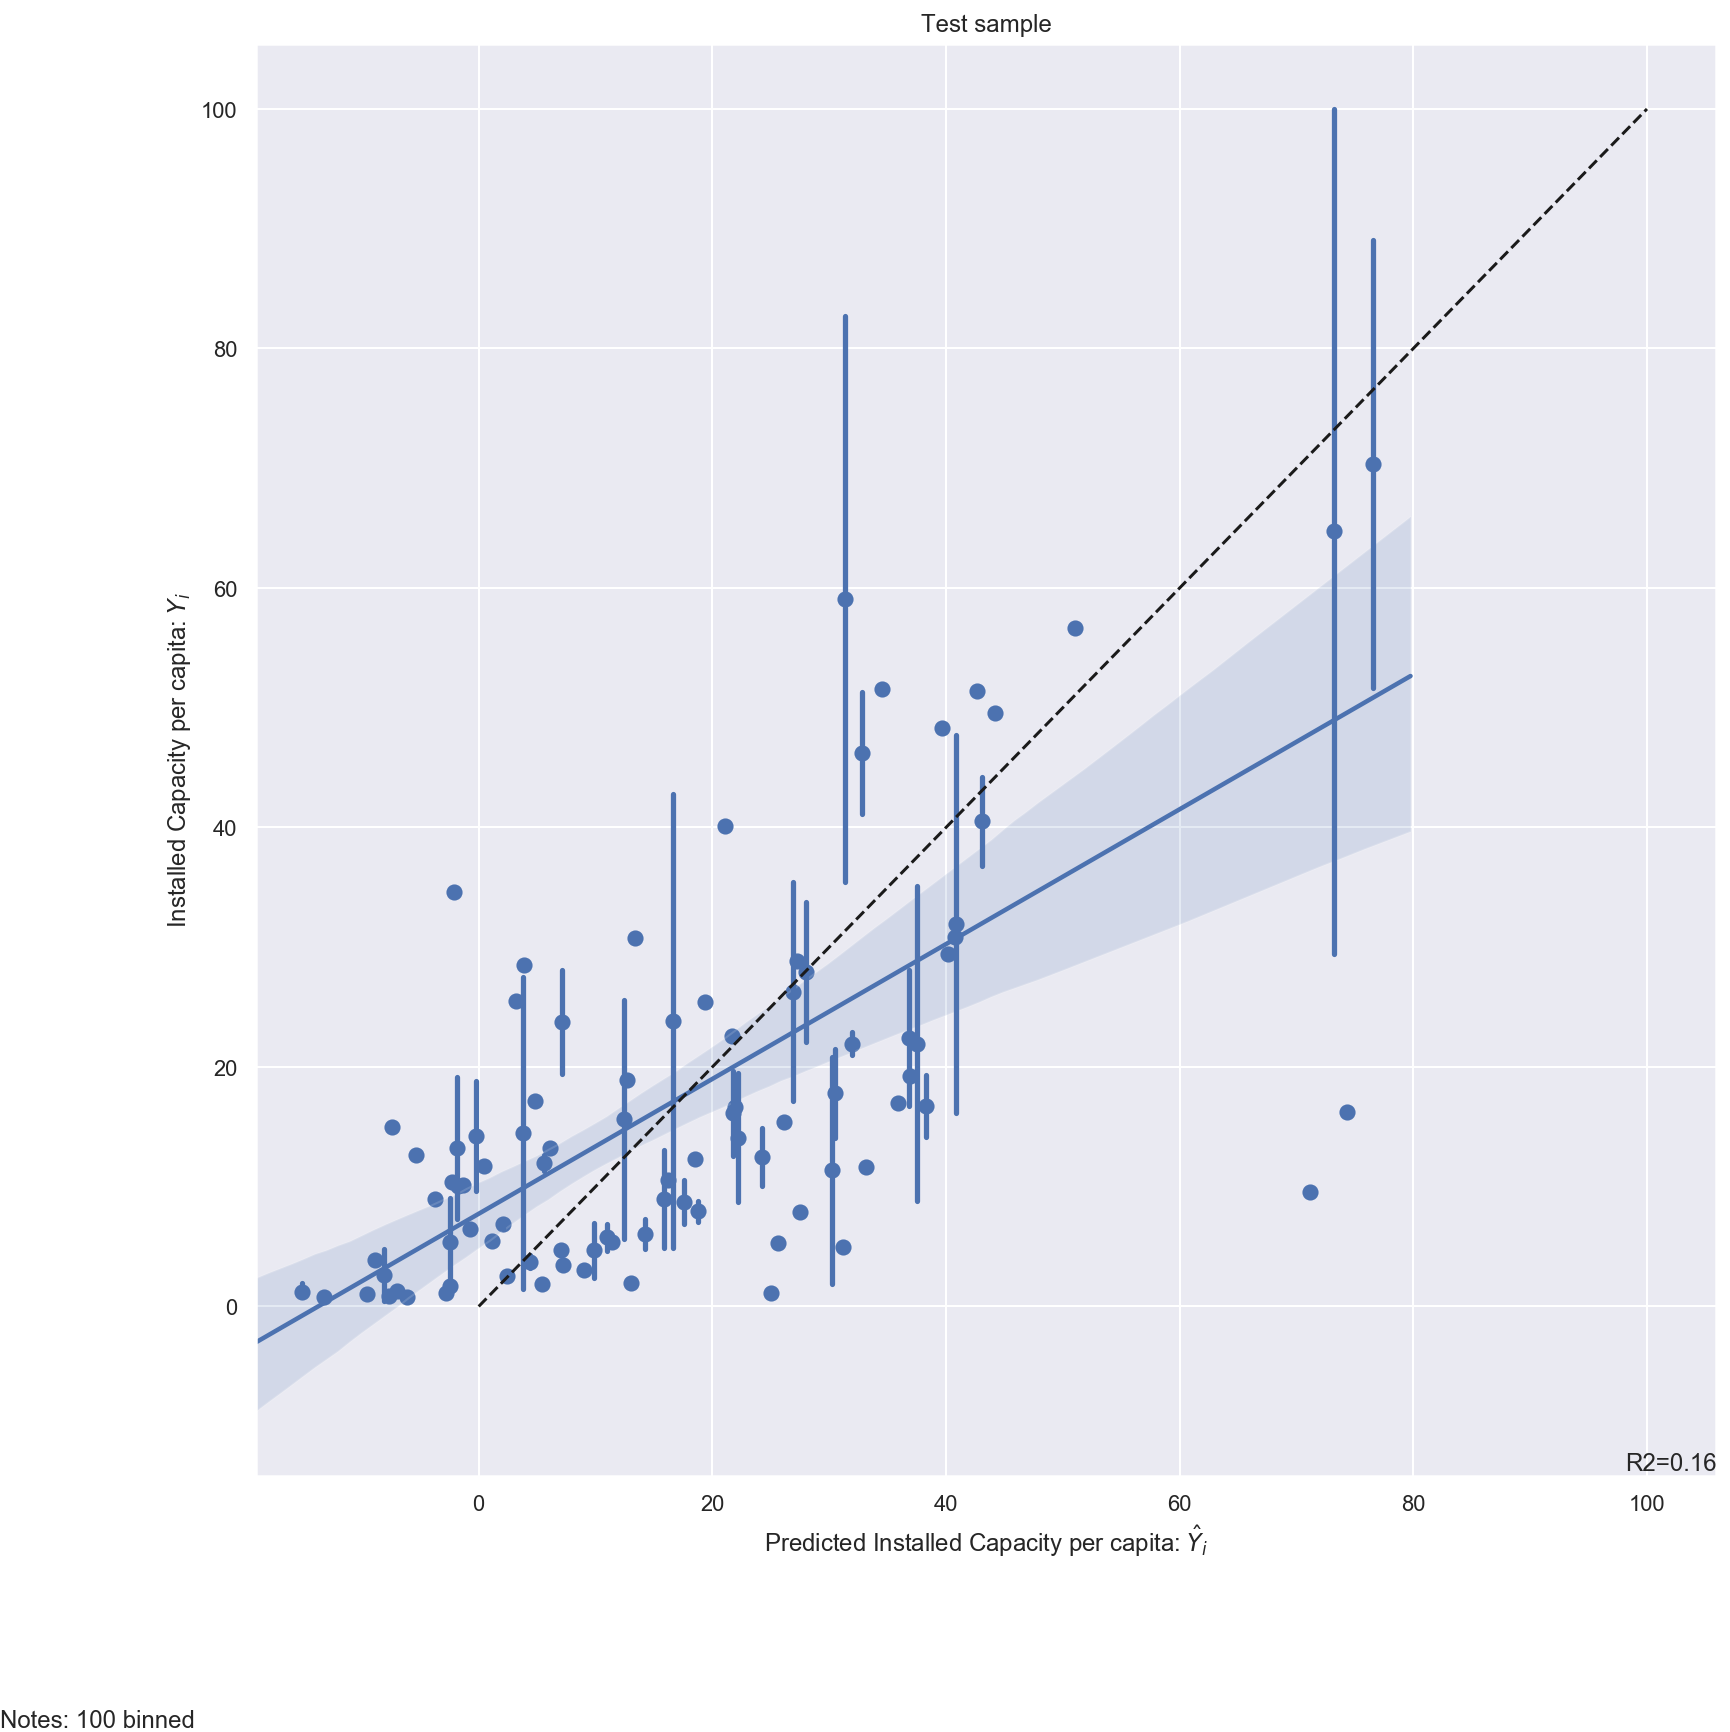

In [527]:
r2 = r2=round(r2_score(Y_test, Y_test_pred), 2)

# Regplot
g=sns.regplot(x= Y_test_pred, y=Y_test, x_bins = 100)
g=g.set_title("Test sample")
plt.xlabel("Predicted Installed Capacity per capita: $\hat{Y}_i$")
plt.ylabel("Installed Capacity per capita: $Y_i$")
plt.annotate('R2={}'.format(r2),
            xy=(1, 0),  xycoords='axes fraction',
            horizontalalignment='right',
            verticalalignment='bottom')
plt.annotate('Notes: 100 binned',
            xy=(0, 0),  xycoords='figure fraction',
            horizontalalignment='left',
            verticalalignment='bottom')
plt.plot([0, 100], [0, 100], '--k')
plt.axis('tight')
plt.tight_layout()
plt.show(g)

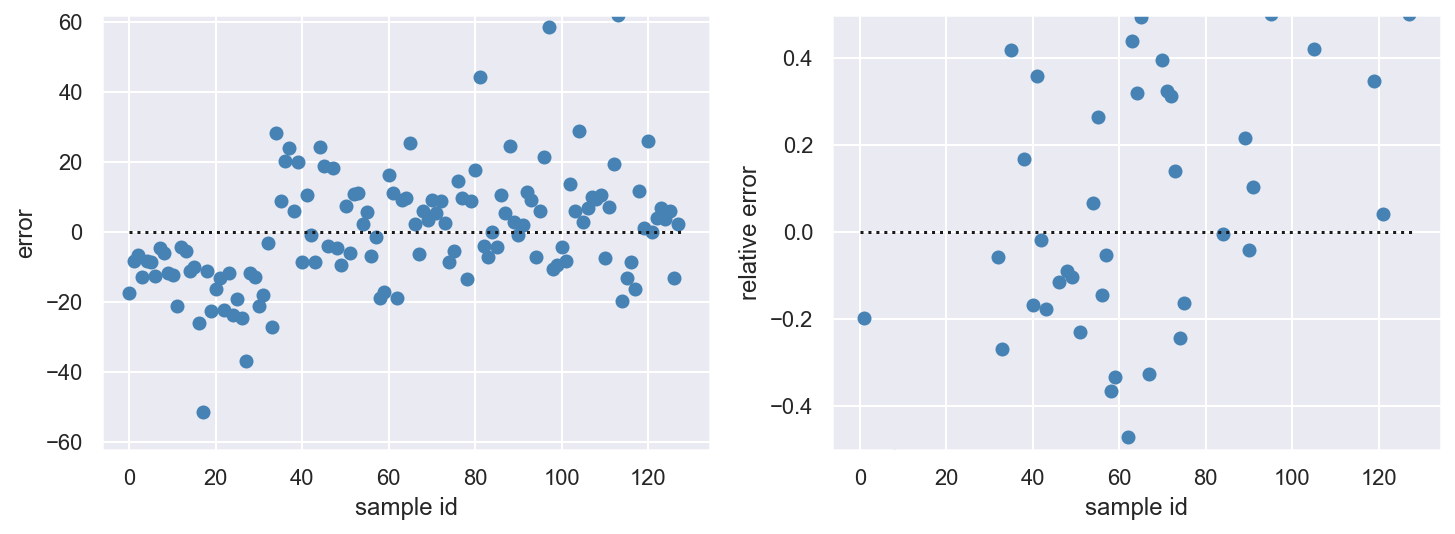

In [528]:
plot_fit_quality(Y_test, Y_test_pred)

[Text(0, 0.5, 'Installed Capacity per capita [W/cap]'),
 Text(0.5, 0, 'Year'),
 Text(0.5, 1.0, 'Annually Installed PV Capacity per capita in Germany [<30kW]')]

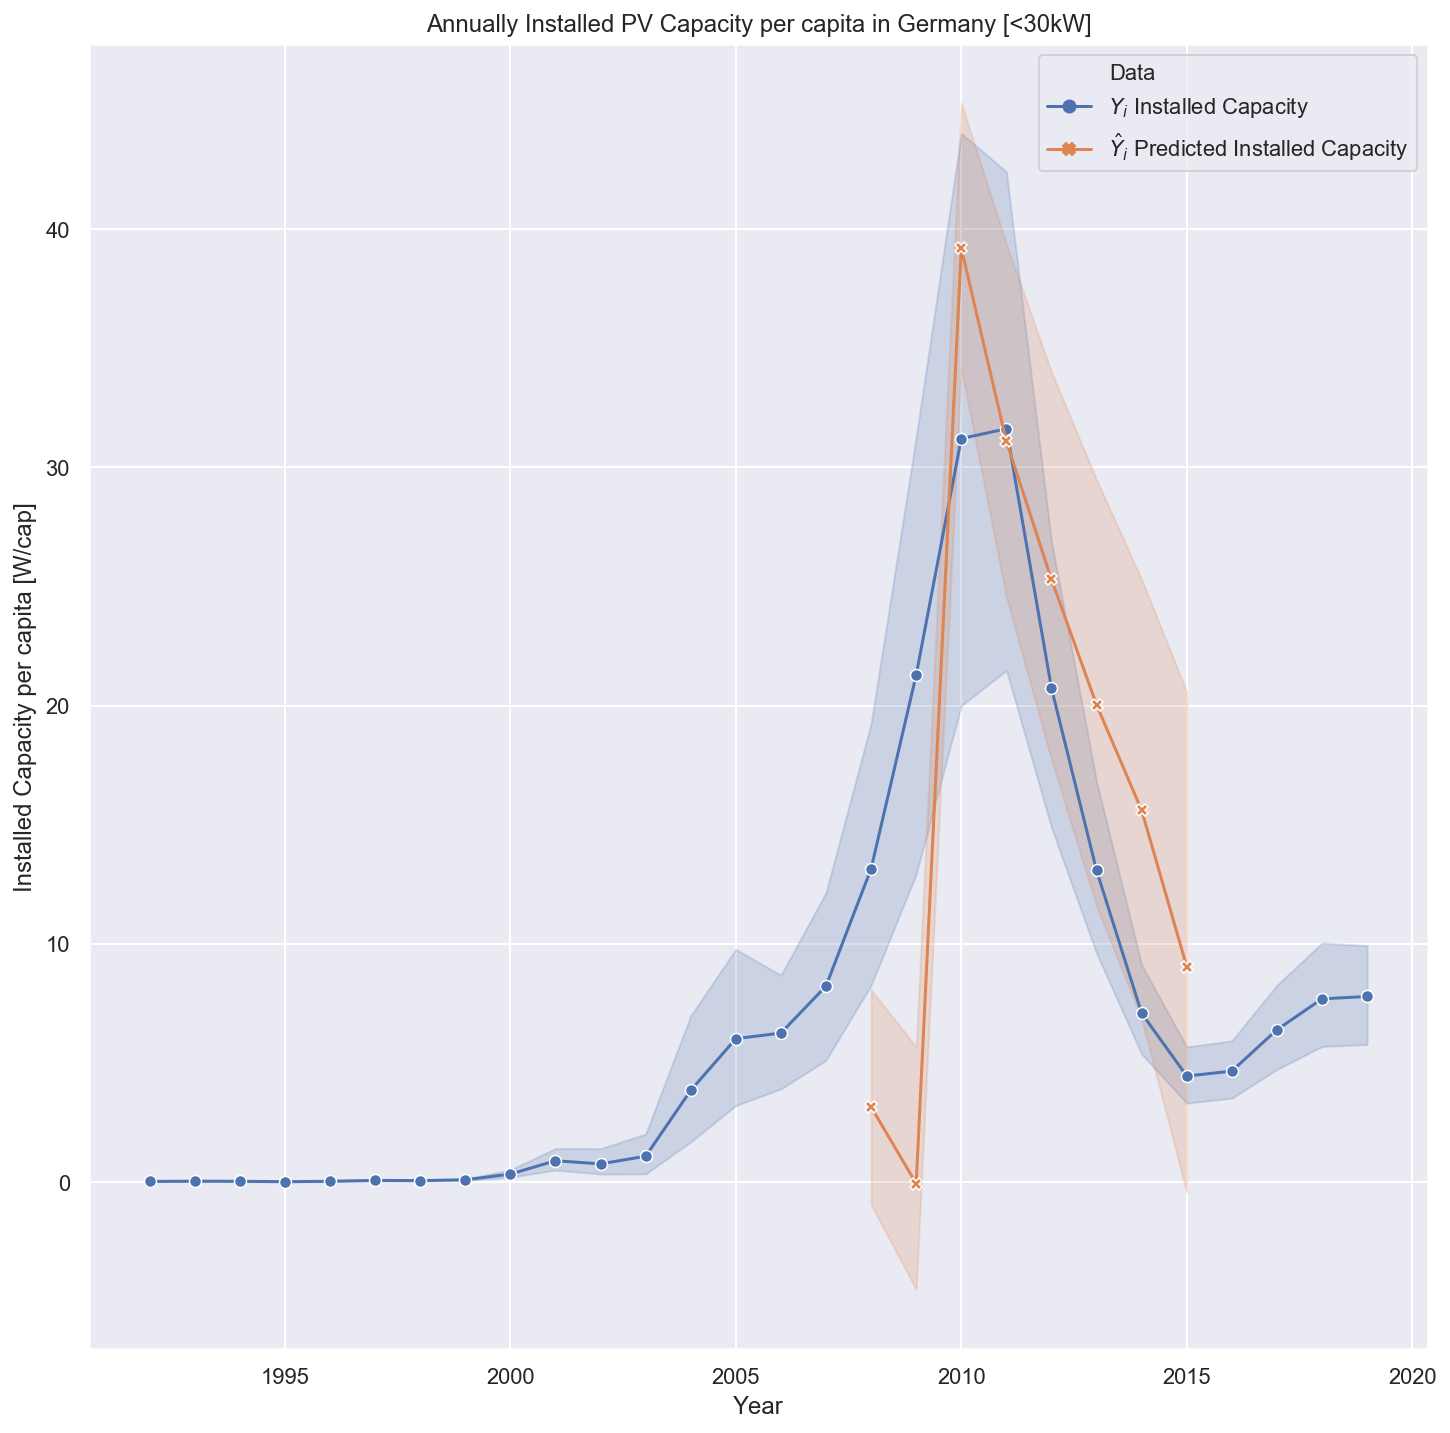

In [529]:
# extract the predicted data into a dataframe
df_pred = np.column_stack((Bundesland_test,X_test[:,0],Y_test,Y_test_pred))
df_pred = pd.DataFrame(df_pred, columns=['Bundesland','Year','Y_test','Y_test_pred'])

# adjust data types
df_pred['Year'] = df_pred['Year'].astype(int)
df_pred['Y_test'] = df_pred['Y_test'].astype(float)
df_pred['Y_test_pred'] = df_pred['Y_test_pred'].astype(float)

# create a new dataframe for plotting the results
df_pred_plot = pd.DataFrame(df_pred, columns=['Bundesland','Year','Y_test_pred'])

# create a new variable "Data" to classify the type of data
df_pred_plot['Data'] = "$\hat{Y}_i$ Predicted Installed Capacity"
df_pred_plot = df_pred_plot.rename(columns = {'Y_test_pred':'Y'})

# merge two data frames with actual and predicted data together
df_plot = pd.merge(Y, df_pred_plot , how='outer', on=['Year','Bundesland','Y','Data'])
df_plot = df_plot.sort_values(by=['Year','Bundesland'])

# plot the results
ax = sns.lineplot(x="Year", y="Y", hue="Data", style="Data", markers=True, dashes=False,
                  data=df_plot)
ax.set(xlabel="Year",
       ylabel="Installed Capacity per capita [W/cap]",
       title= "Annually Installed PV Capacity per capita in Germany [<30kW]")

### Lasso regression

In [201]:
from sklearn.linear_model import Lasso
lasso_reg=Lasso(alpha=1) 

lasso_reg.fit(X_train, Y_train)

Y_train_pred = lasso_reg.predict(X_train) 
Y_test_pred = lasso_reg.predict(X_test)        

train_mse = mean_squared_error(Y_train, Y_train_pred)
train_rmse = np.sqrt(train_mse)

test_mse = mean_squared_error(Y_test, Y_test_pred)
test_rmse = np.sqrt(test_mse)

print("train RMS: %s" % train_rmse) 
print("test RMS: %s" % test_rmse) 
print("train R2: %s" % round(r2_score(Y_train, Y_train_pred), 2)) 
print("test R2: %s" % round(r2_score(Y_test, Y_test_pred), 2))

train RMS: 3.1732383612386026
test RMS: 15.58850979419274
train R2: 0.58
test R2: 0.02


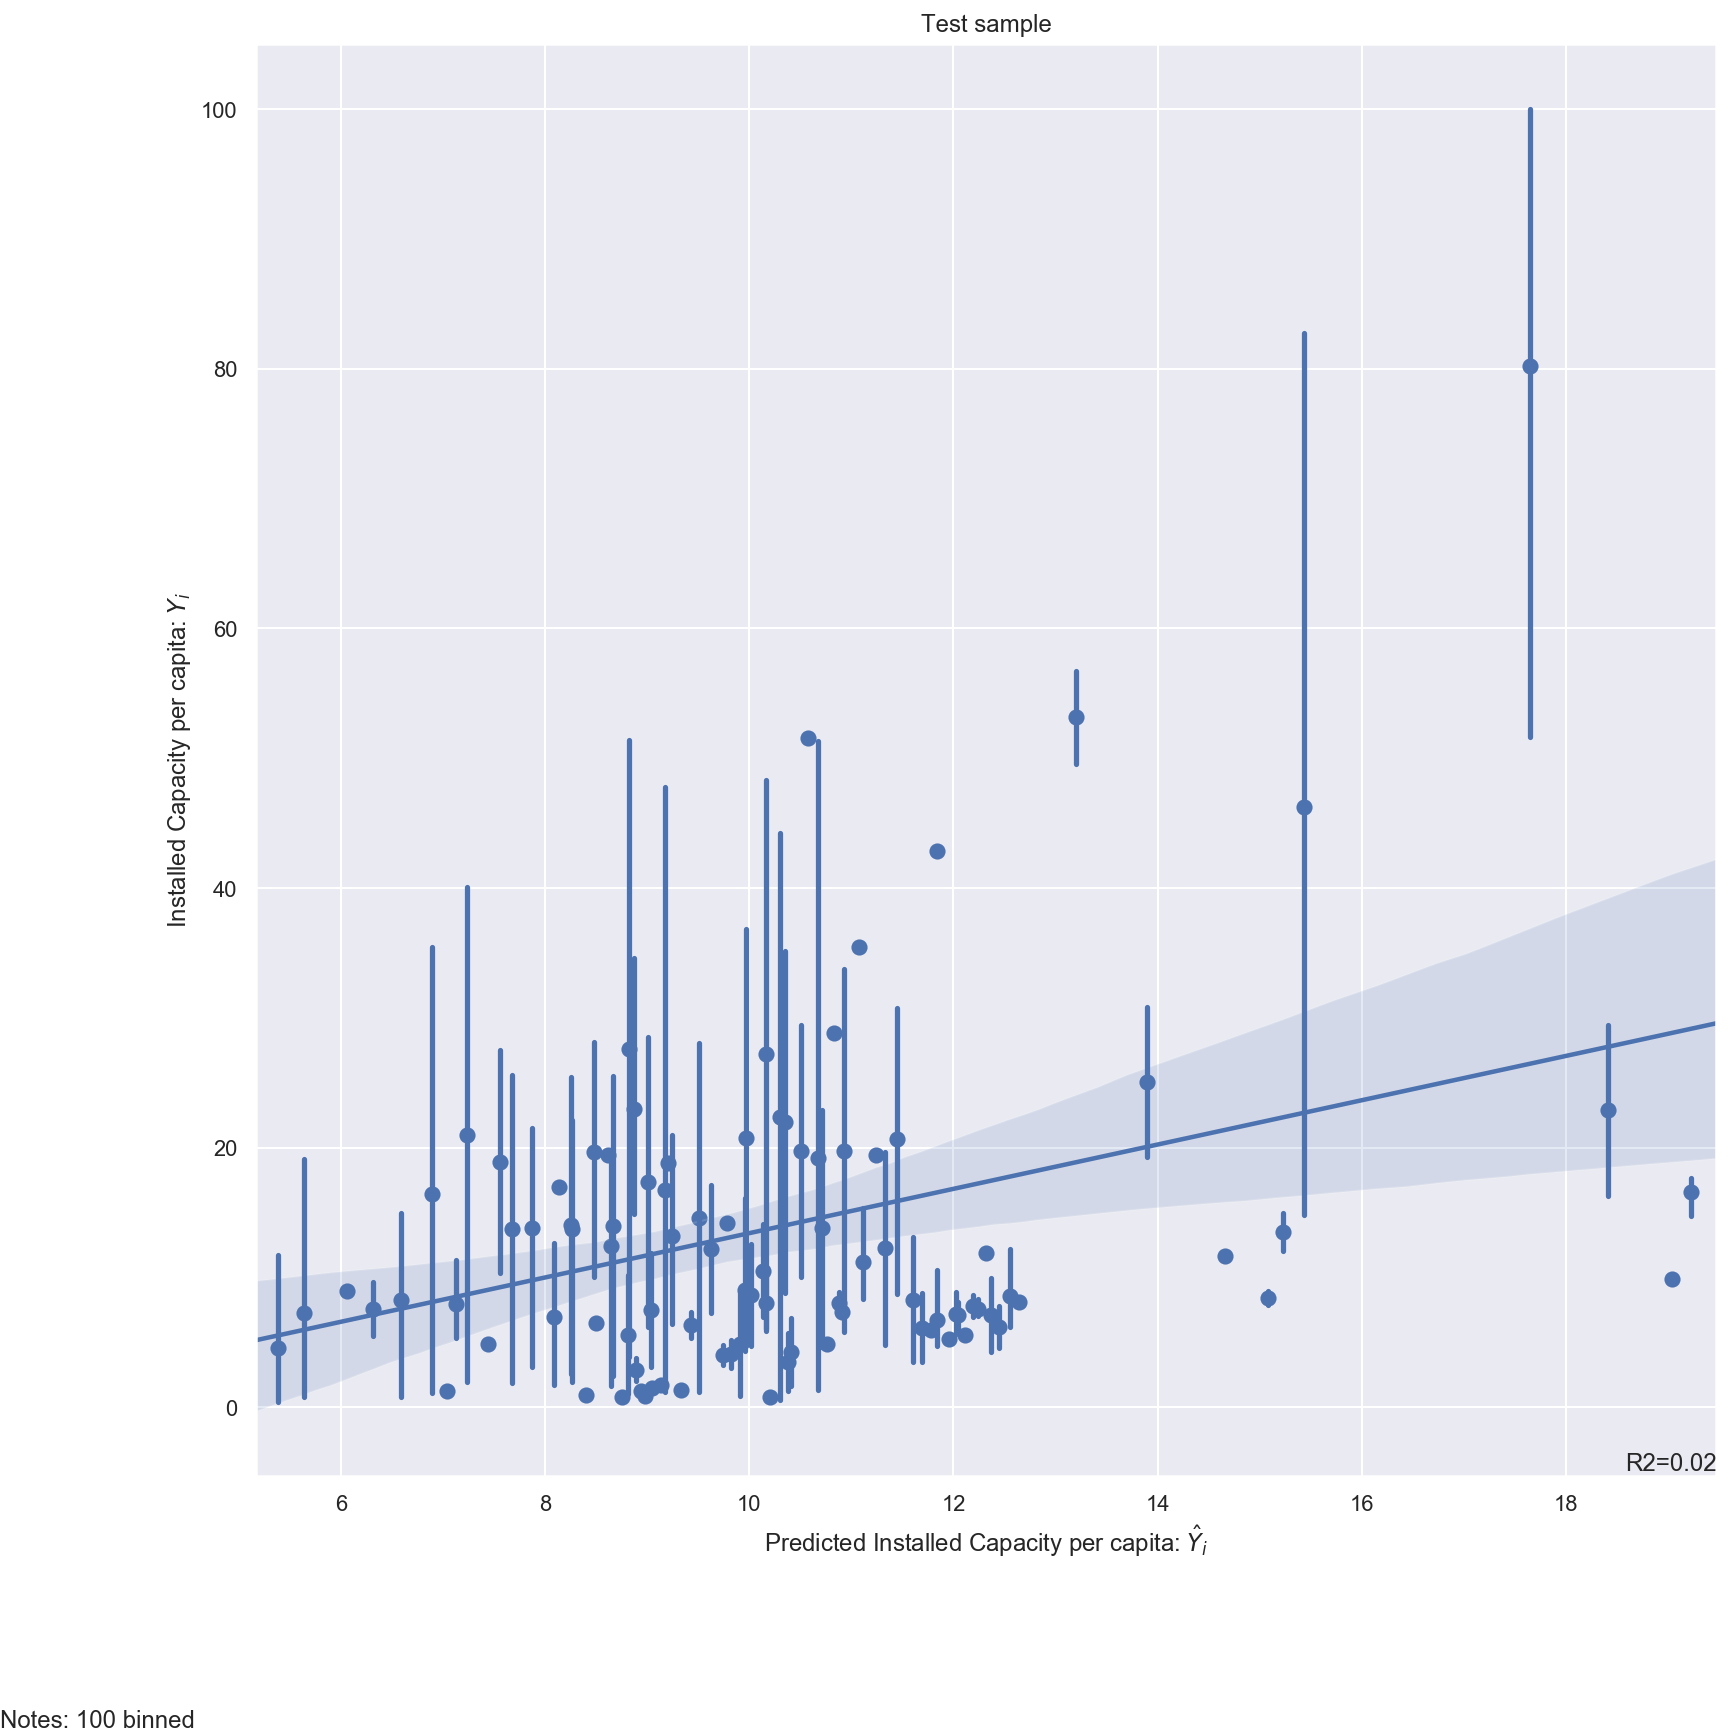

In [202]:
r2 = r2=round(r2_score(Y_test, Y_test_pred), 2)

# Regplot
g=sns.regplot(x= Y_test_pred, y=Y_test, x_bins = 100)
g=g.set_title("Test sample")
plt.xlabel("Predicted Installed Capacity per capita: $\hat{Y}_i$")
plt.ylabel("Installed Capacity per capita: $Y_i$")
plt.annotate('R2={}'.format(r2),
            xy=(1, 0),  xycoords='axes fraction',
            horizontalalignment='right',
            verticalalignment='bottom')
plt.annotate('Notes: 100 binned',
            xy=(0, 0),  xycoords='figure fraction',
            horizontalalignment='left',
            verticalalignment='bottom')
#plt.plot([-10000, 300000], [-10000, 300000], '--k')
plt.axis('tight')
plt.tight_layout()
plt.show(g)

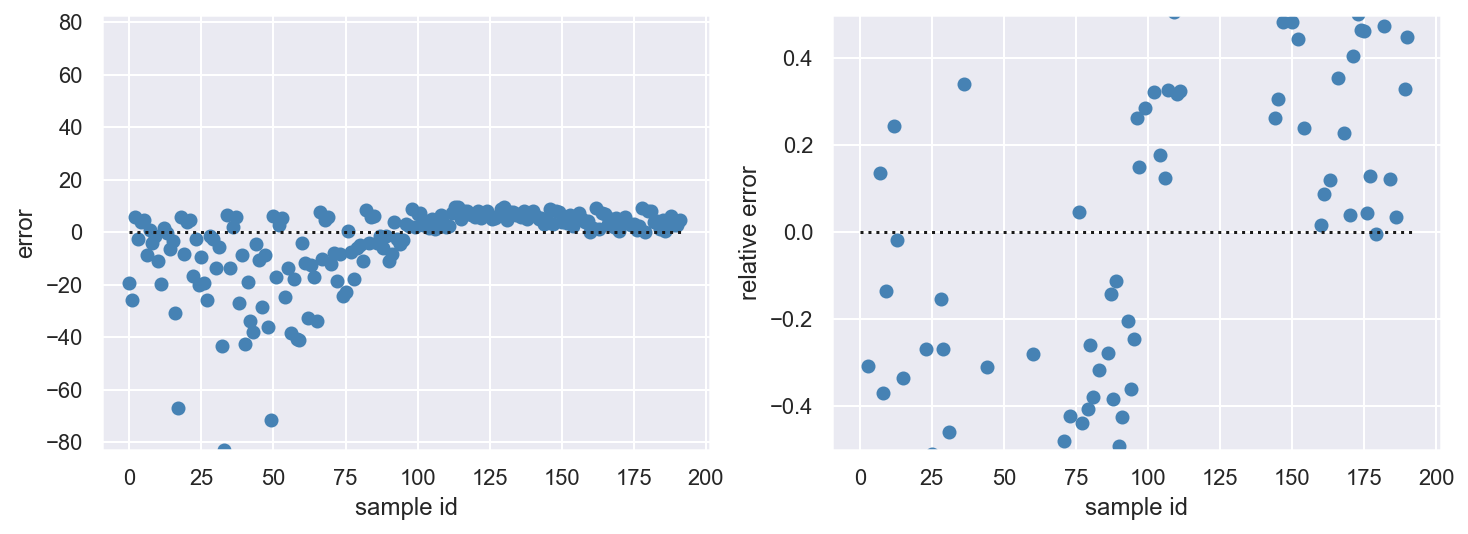

In [203]:
plot_fit_quality(Y_test, Y_test_pred)

[Text(0, 0.5, 'Installed Capacity per capita [W/cap]'),
 Text(0.5, 0, 'Year'),
 Text(0.5, 1.0, 'Annually Installed PV Capacity per capita in Germany [<30kW]')]

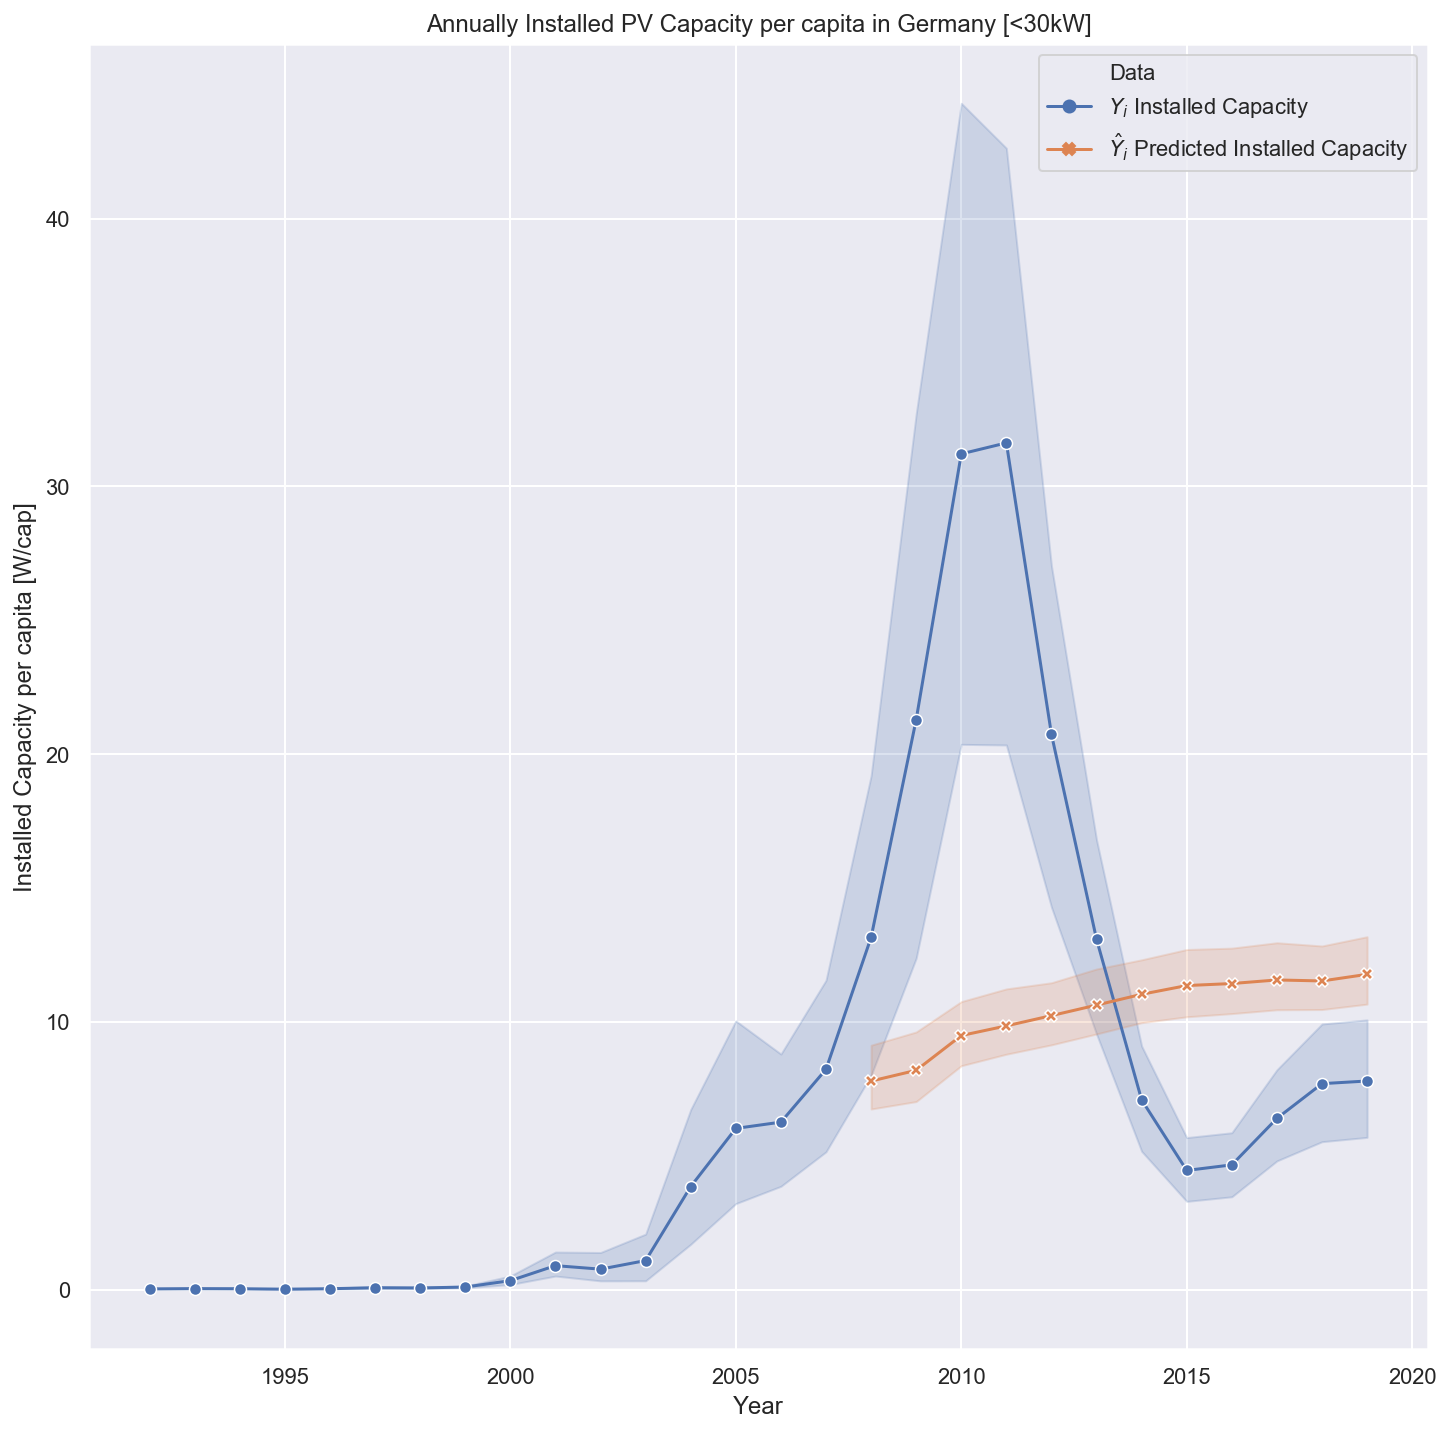

In [204]:
# extract the predicted data into a dataframe
df_pred = np.column_stack((Bundesland_test,X_test[:,0],Y_test,Y_test_pred))
df_pred = pd.DataFrame(df_pred, columns=['Bundesland','Year','Y_test','Y_test_pred'])

# adjust data types
df_pred['Year'] = df_pred['Year'].astype(int)
df_pred['Y_test'] = df_pred['Y_test'].astype(float)
df_pred['Y_test_pred'] = df_pred['Y_test_pred'].astype(float)

# create a new dataframe for plotting the results
df_pred_plot = pd.DataFrame(df_pred, columns=['Bundesland','Year','Y_test_pred'])

# create a new variable "Data" to classify the type of data
df_pred_plot['Data'] = "$\hat{Y}_i$ Predicted Installed Capacity"
df_pred_plot = df_pred_plot.rename(columns = {'Y_test_pred':'Y'})

# merge two data frames with actual and predicted data together
df_plot = pd.merge(Y, df_pred_plot , how='outer', on=['Year','Bundesland','Y','Data'])
df_plot = df_plot.sort_values(by=['Year','Bundesland'])

# plot the results
ax = sns.lineplot(x="Year", y="Y", hue="Data", style="Data", markers=True, dashes=False,
                  data=df_plot)
ax.set(xlabel="Year",
       ylabel="Installed Capacity per capita [W/cap]",
       title= "Annually Installed PV Capacity per capita in Germany [<30kW]")

### Elastic net

In [206]:
from sklearn.linear_model import ElasticNet
elanet_reg=ElasticNet(random_state=0)

elanet_reg.fit(X_train, Y_train)

Y_train_pred = elanet_reg.predict(X_train)
Y_test_pred = elanet_reg.predict(X_test)

train_mse = mean_squared_error(Y_train, Y_train_pred)
train_rmse = np.sqrt(train_mse)

test_mse = mean_squared_error(Y_test, Y_test_pred)
test_rmse = np.sqrt(test_mse)

print("train RMS: %s" % train_rmse) 
print("test RMS: %s" % test_rmse) 
print("train R2: %s" % round(r2_score(Y_train, Y_train_pred), 2)) 
print("test R2: %s" % round(r2_score(Y_test, Y_test_pred), 2))

train RMS: 3.16320523408243
test RMS: 15.58584602311666
train R2: 0.58
test R2: 0.02


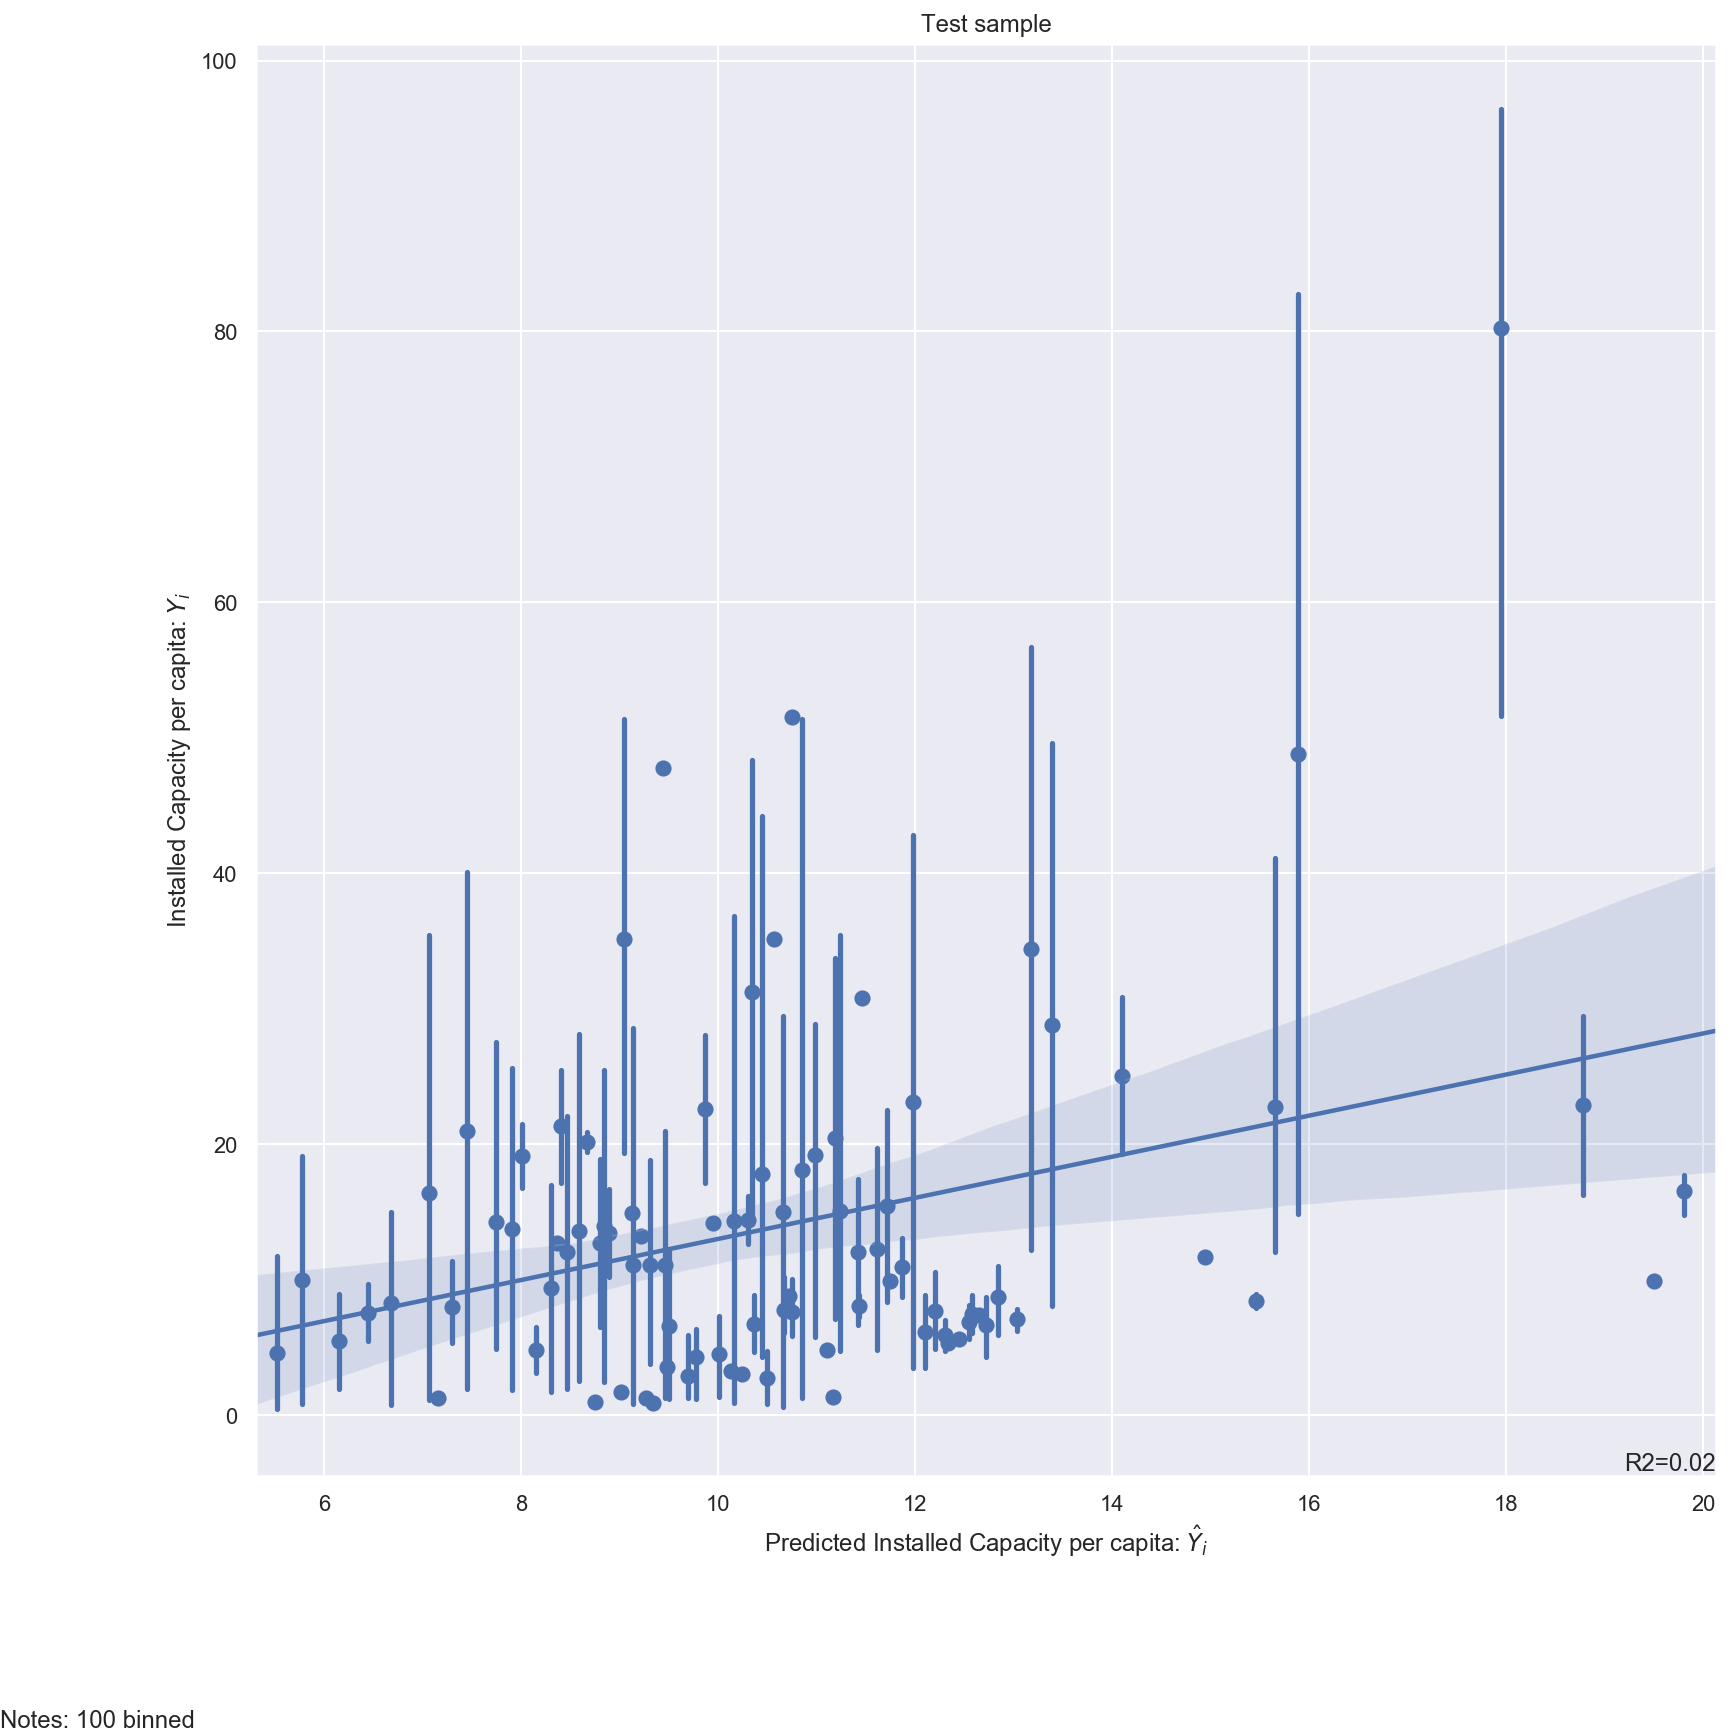

In [207]:
r2 = r2=round(r2_score(Y_test, Y_test_pred), 2)

# Regplot
g=sns.regplot(x= Y_test_pred, y=Y_test, x_bins = 100)
g=g.set_title("Test sample")
plt.xlabel("Predicted Installed Capacity per capita: $\hat{Y}_i$")
plt.ylabel("Installed Capacity per capita: $Y_i$")
plt.annotate('R2={}'.format(r2),
            xy=(1, 0),  xycoords='axes fraction',
            horizontalalignment='right',
            verticalalignment='bottom')
plt.annotate('Notes: 100 binned',
            xy=(0, 0),  xycoords='figure fraction',
            horizontalalignment='left',
            verticalalignment='bottom')
#plt.plot([-10000, 300000], [-10000, 300000], '--k')
plt.axis('tight')
plt.tight_layout()
plt.show(g)

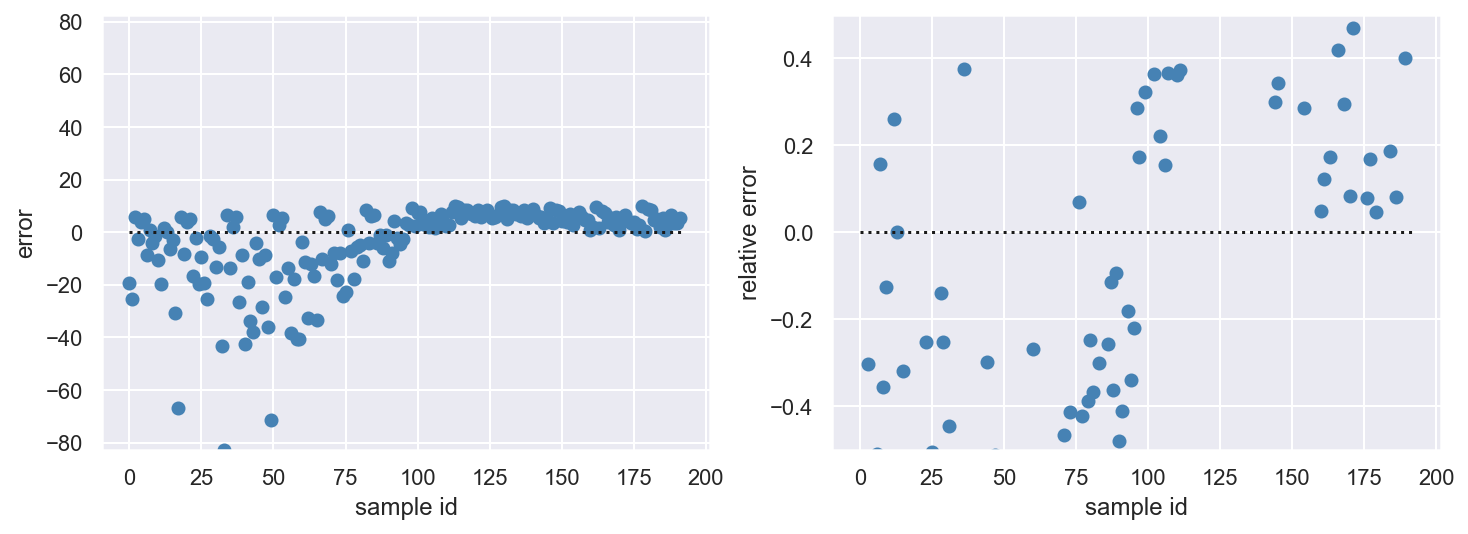

In [208]:
plot_fit_quality(Y_test, Y_test_pred)

[Text(0, 0.5, 'Installed Capacity per capita [W/cap]'),
 Text(0.5, 0, 'Year'),
 Text(0.5, 1.0, 'Annually Installed PV Capacity per capita in Germany [<30kW]')]

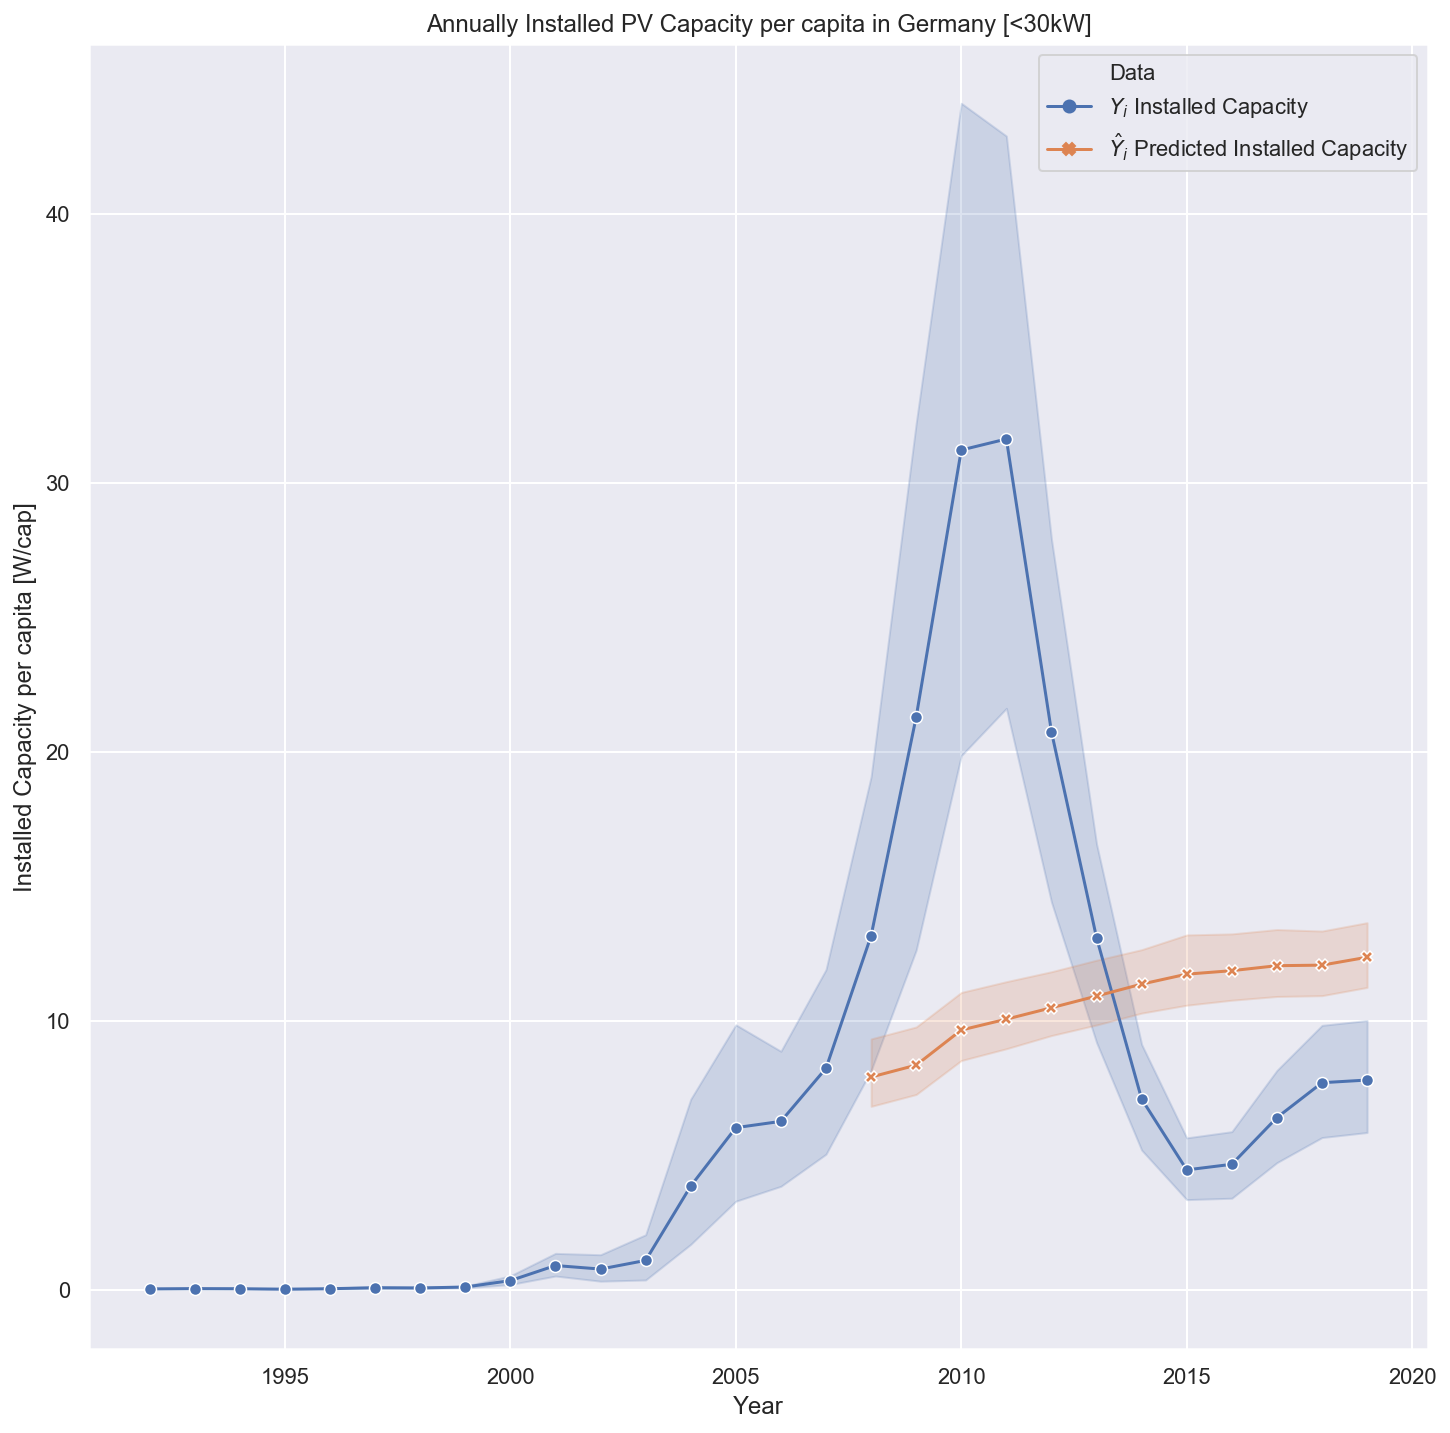

In [209]:
# extract the predicted data into a dataframe
df_pred = np.column_stack((Bundesland_test,X_test[:,0],Y_test,Y_test_pred))
df_pred = pd.DataFrame(df_pred, columns=['Bundesland','Year','Y_test','Y_test_pred'])

# adjust data types
df_pred['Year'] = df_pred['Year'].astype(int)
df_pred['Y_test'] = df_pred['Y_test'].astype(float)
df_pred['Y_test_pred'] = df_pred['Y_test_pred'].astype(float)

# create a new dataframe for plotting the results
df_pred_plot = pd.DataFrame(df_pred, columns=['Bundesland','Year','Y_test_pred'])

# create a new variable "Data" to classify the type of data
df_pred_plot['Data'] = "$\hat{Y}_i$ Predicted Installed Capacity"
df_pred_plot = df_pred_plot.rename(columns = {'Y_test_pred':'Y'})

# merge two data frames with actual and predicted data together
df_plot = pd.merge(Y, df_pred_plot , how='outer', on=['Year','Bundesland','Y','Data'])
df_plot = df_plot.sort_values(by=['Year','Bundesland'])

# plot the results
ax = sns.lineplot(x="Year", y="Y", hue="Data", style="Data", markers=True, dashes=False,
                  data=df_plot)
ax.set(xlabel="Year",
       ylabel="Installed Capacity per capita [W/cap]",
       title= "Annually Installed PV Capacity per capita in Germany [<30kW]")